
# Table of Contents


### 1. Importing Libraries
### 2. Importing Data
### 3. Visualizations
#### 3.1 Spending Habits by Region
#### 3.2 Busiest Days Of the Week
#### 3.3 Busiest Hour of the Day
#### 3.4 Most Spending Time
#### 3.5 Department with highest amount of orders
#### 3.6 Difference in Spending Habits of Loyalty Groups
#### 3.7 Loyalty Groups & Price Range Buying Behavior
#### 3.8 Loyalty Groups & Order Frequency Behavior
#### 3.9 Spending Behavior By Region
#### 3.10 Order Frequency by Region
#### 3.11 Spending Behavior by Age Group
#### 3.12 Loyalty status by Age Group
#### 3.13 Relation between Age Group and Order Frequency
#### 3.14 Family Status Group Percentage of Whole
#### 3.15 Spending Habits by Family Status
#### 3.16 Order Frequency by Family Status
#### 3.17 Department Order Frequency by Family Status
#### 3.18 Department Order Frequency by Family Status Heatmap
#### 3.19 Department Order Frequency by Age Group
#### 3.20 Department Order Frequency by Age Group (normalized)
#### 3.21 Heatmap Department Order Frequency by Age Group
#### 3.22 Order Frequency by Income Group
#### 3.23 Spending Behavior by Income Group
#### 3.24 Department Order Frequency by Income Group
#### 3.25 Pet Owners by Region
#### 3.26 Product Preference by Region

# 1. Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


# 2. Importing Data


In [9]:
# Import ords_prods_deps_cust_profile_pet.pkl
df_final_analysis = pd.read_pickle(r'/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/02 - Data/Prepared Data/ords_prods_deps_cust_profile_pet.pkl')

In [17]:
df_final_analysis

,gender,state,age,date_joined,num_dependants,family_status,income,order_id,order_number,order_weekday,...,region,high_activity_flag,age_group,income_group,order_timing_week,order_timing_day,product_preference,pet_owner_x,pet_owner_y,pet_owner
0,Female,Missouri,48,2017-01-01,3,Large Family,165665,518967,1,2,...,Region 2 - Midwest,True,Middle-Aged Adult,High Income,Weekday Shopper,Morning Shopper,General Shopper,0,Non-Pet Owner,Non-Pet Owner
1,Female,Missouri,48,2017-01-01,3,Large Family,165665,423547,2,2,...,Region 2 - Midwest,True,Middle-Aged Adult,High Income,Weekday Shopper,Morning Shopper,General Shopper,0,Non-Pet Owner,Non-Pet Owner
2,Female,Missouri,48,2017-01-01,3,Large Family,165665,2524893,3,3,...,Region 2 - Midwest,True,Middle-Aged Adult,High Income,Weekday Shopper,Morning Shopper,General Shopper,0,Non-Pet Owner,Non-Pet Owner
3,Female,Missouri,48,2017-01-01,3,Large Family,165665,2524893,3,3,...,Region 2 - Midwest,True,Middle-Aged Adult,High Income,Weekday Shopper,Morning Shopper,General Shopper,0,Non-Pet Owner,Non-Pet Owner
4,Female,Missouri,48,2017-01-01,3,Large Family,165665,2524893,3,3,...,Region 2 - Midwest,True,Middle-Aged Adult,High Income,Weekday Shopper,Morning Shopper,General Shopper,0,Non-Pet Owner,Non-Pet Owner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30992659,Female,Missouri,66,2020-04-01,2,Small Family,53374,2498530,8,6,...,Region 2 - Midwest,True,Senior,Middle Income,All Week Shopper,Night Shopper,General Shopper,0,Non-Pet Owner,Non-Pet Owner
30992660,Female,Missouri,66,2020-04-01,2,Small Family,53374,2498530,8,6,...,Region 2 - Midwest,True,Senior,Middle Income,All Week Shopper,Night Shopper,General Shopper,0,Non-Pet Owner,Non-Pet Owner
30992661,Female,Missouri,66,2020-04-01,2,Small Family,53374,2498530,8,6,...,Region 2 - Midwest,True,Senior,Middle Income,All Week Shopper,Night Shopper,General Shopper,0,Non-Pet Owner,Non-Pet Owner
30992662,Female,Missouri,66,2020-04-01,2,Small Family,53374,2498530,8,6,...,Region 2 - Midwest,True,Senior,Middle Income,All Week Shopper,Night Shopper,General Shopper,0,Non-Pet Owner,Non-Pet Owner


In [18]:
# Display frequency distribution
print(df_final_analysis['pet_owner'].value_counts(normalize=True) * 100)

pet_owner
Non-Pet Owner    97.522249
Pet Owner         2.477751
Name: proportion, dtype: float64


# 3. Visualizations


## 3.1 Spending Habits By Region


Crosstab of regions and spending flags:
spending_flag         High spender  Low spender
region                                         
Region 1 - Northeast        103230      5366838
Region 2 - Midwest          148829      7118878
Region 3 - South            199815     10120647
Region 4 - West             152710      7781717


<Figure size 1000x600 with 0 Axes>

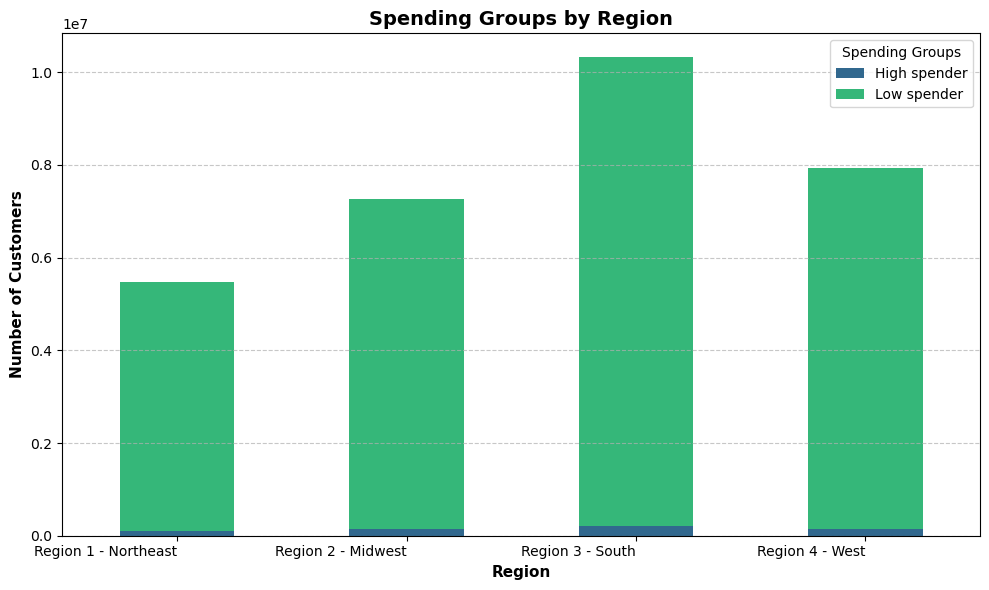

In [34]:
# Create crosstab for spending habits by region
region_spending_crosstab = pd.crosstab(df_final_analysis['region'], df_final_analysis['spending_flag'])

# Display the crosstab
print("Crosstab of regions and spending flags:")
print(region_spending_crosstab)

# Define a custom color palette for better visuals
custom_palette = sns.color_palette("viridis", n_colors=len(region_spending_crosstab.columns))

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
region_spending_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_palette)

# Customize the plot aesthetics
plt.title('Spending Groups by Region', fontsize=14, fontweight='bold')
plt.xlabel('Region', fontsize=11, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=11, fontweight='bold')
plt.xticks(rotation=0, ha='right')  # Adjust rotation for better readability
plt.legend(title='Spending Groups')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines

# Save the plot as a PNG file with high resolution
plt.tight_layout()
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/spending_groups_by_region.png', dpi=300)

# Show the plot
plt.show()

## 3.2 Busiest Days Of the Week

/var/folders/l6/kxjkdn9x2hz2slywnf_9gymm0000gp/T/ipykernel_78363/772996955.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_labels, y=order_counts, palette=custom_palette)


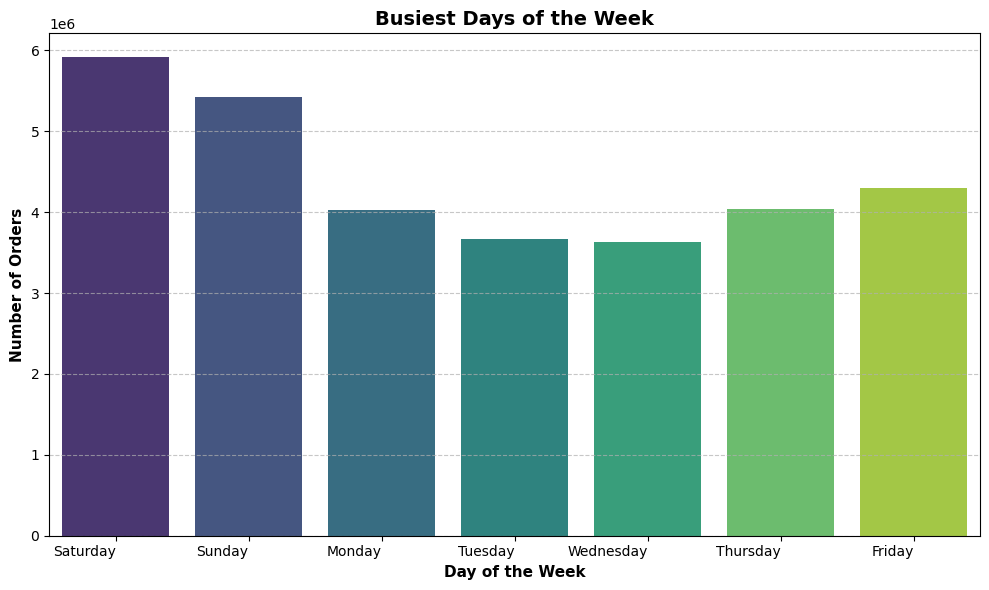

In [36]:
# Count orders per weekday and sort them correctly (Saturday = 0, Friday = 6)
order_counts = df_final_analysis['order_weekday'].value_counts().sort_index()

# Define the weekday labels with Saturday as 0 and Friday as 6
weekday_labels = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Define a custom color palette
custom_palette = sns.color_palette("viridis", len(order_counts))

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_labels, y=order_counts, palette=custom_palette)

# Customize aesthetics
plt.title('Busiest Days of the Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=11, fontweight='bold')
plt.ylabel('Number of Orders', fontsize=11, fontweight='bold')
plt.xticks(rotation=0, ha='right')  # Ensure readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines

# Save the figure as a high-quality PNG
plt.tight_layout()
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/busiest_days_of_week.png', dpi=300)

# Show the plot
plt.show()

## 3.3 Busiest Hour of the Day

/var/folders/l6/kxjkdn9x2hz2slywnf_9gymm0000gp/T/ipykernel_78363/1388234717.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_order_counts.index, y=hourly_order_counts.values, palette=custom_palette)


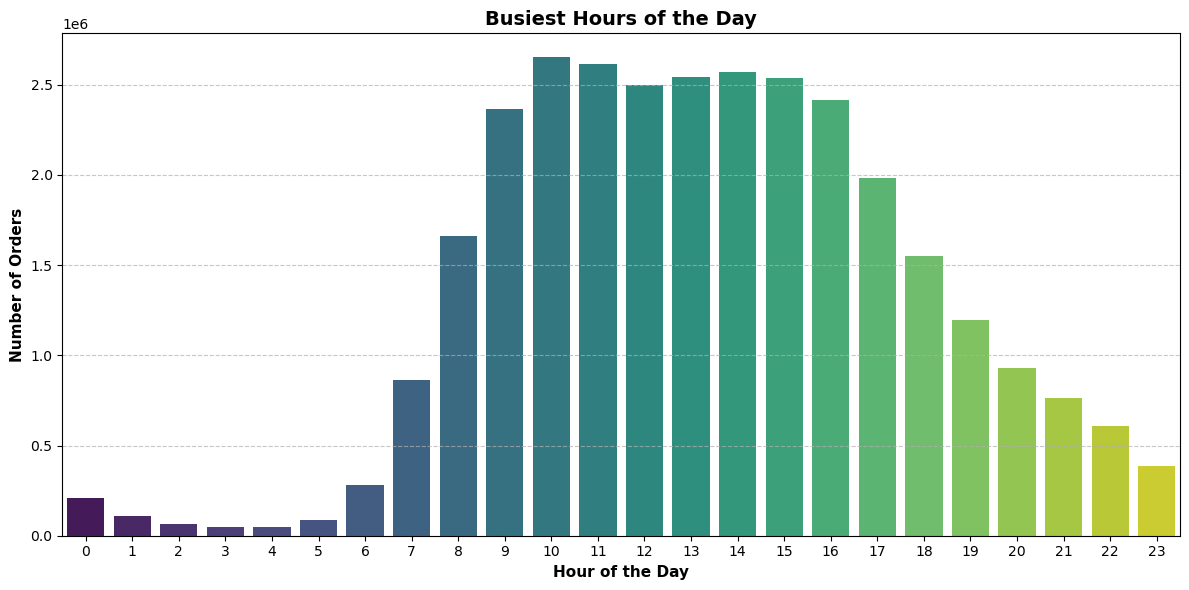

In [41]:
# Count orders per hour
hourly_order_counts = df_final_analysis['order_hour'].value_counts().sort_index()

# Define a custom color palette
custom_palette = sns.color_palette("viridis", len(hourly_order_counts))

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_order_counts.index, y=hourly_order_counts.values, palette=custom_palette)

# Customize aesthetics
plt.title('Busiest Hours of the Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=11, fontweight='bold')
plt.ylabel('Number of Orders', fontsize=11, fontweight='bold')
plt.xticks(rotation=0)  # Keep labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines

# Save the figure as a high-quality PNG
plt.tight_layout()
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/busiest_hours_of_day.png', dpi=300)

# Show the plot
plt.show()

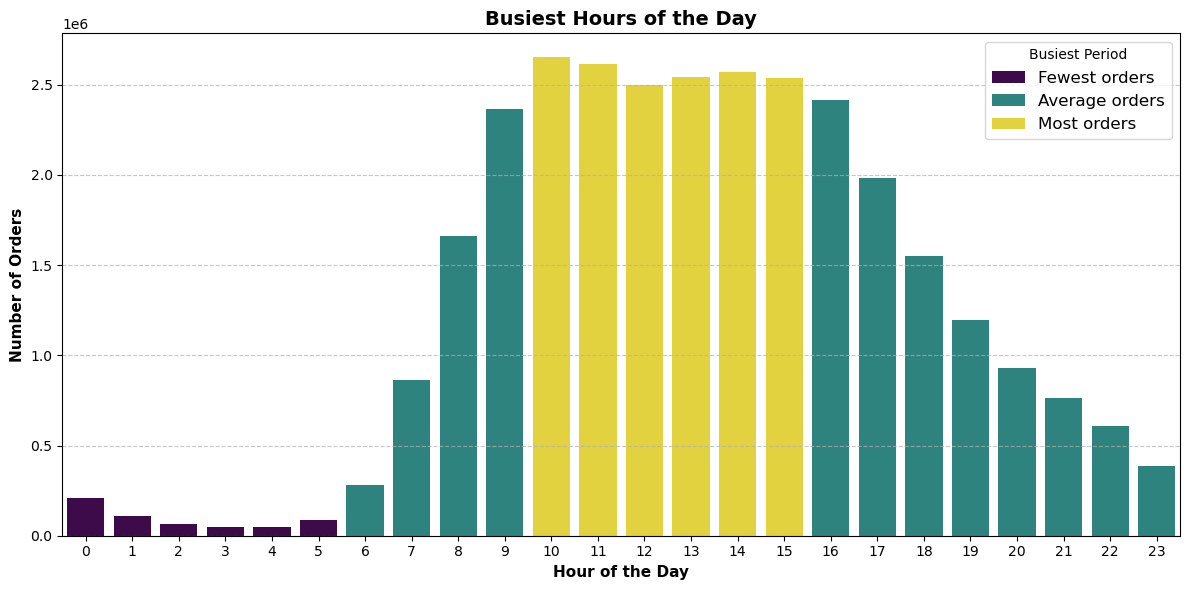

In [49]:
# Count orders per hour
hourly_order_counts = df_final_analysis.groupby(['order_hour', 'busiest_period_of_day']).size().reset_index(name='order_count')

# Define the color palette for the busiest periods
custom_palette = {'Fewest orders': '#440154',  # Dark purple
                  'Average orders': '#21918c',  # Teal
                  'Most orders': '#fde725'}  # Bright yellow

# Set up the figure
plt.figure(figsize=(12, 6))
sns.barplot(x='order_hour', y='order_count', hue='busiest_period_of_day', data=hourly_order_counts, palette=custom_palette)

# Customize aesthetics
plt.title('Busiest Hours of the Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=11, fontweight='bold')
plt.ylabel('Number of Orders', fontsize=11, fontweight='bold')
plt.xticks(rotation=0)  # Keep labels horizontal
plt.legend(title='Busiest Period', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines

# Save the figure as a high-quality PNG
plt.tight_layout()
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/busiest_hours_by_period.png', dpi=300)

# Show the plot
plt.show()


## 3.4 Most Spending Time

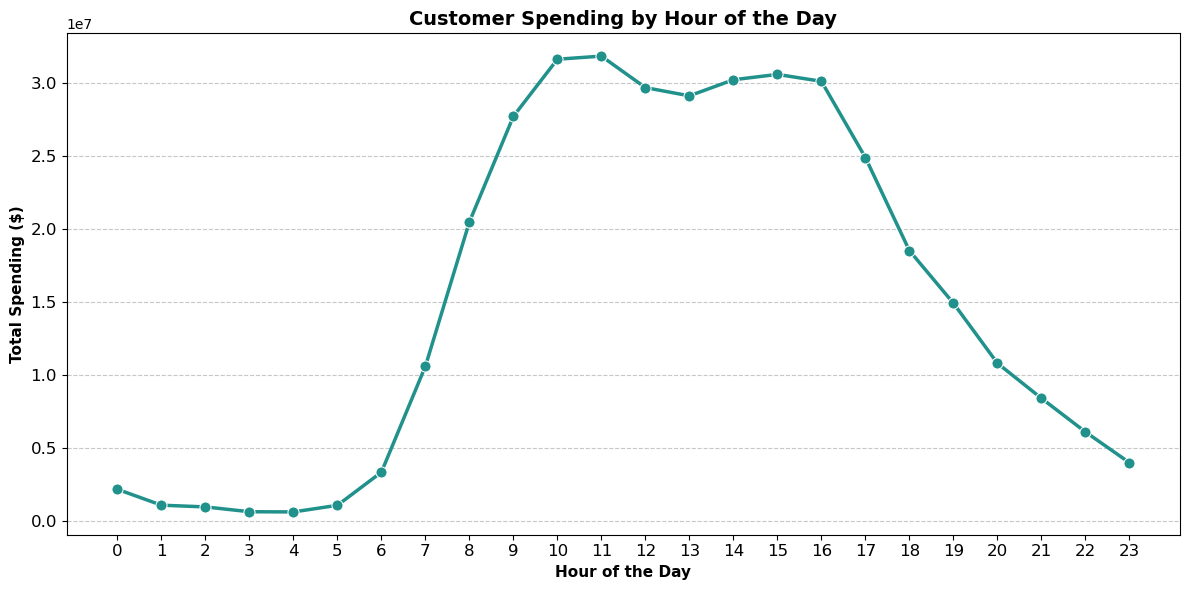

In [54]:
# Aggregate total spending per hour
hourly_spending = df_final_analysis.groupby('order_hour')['prices'].sum().reset_index()

# Set the style and figure size
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_hour', y='prices', data=hourly_spending, color='#21918c', marker='o', linewidth=2.5, markersize=8)

# Customize aesthetics
plt.title('Customer Spending by Hour of the Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=11, fontweight='bold')
plt.ylabel('Total Spending ($)', fontsize=11, fontweight='bold')
plt.xticks(range(0, 24), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines

# Save the figure as a high-quality PNG
plt.tight_layout()
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/customer_spending_by_hour.png', dpi=300)

# Show the plot
plt.show()

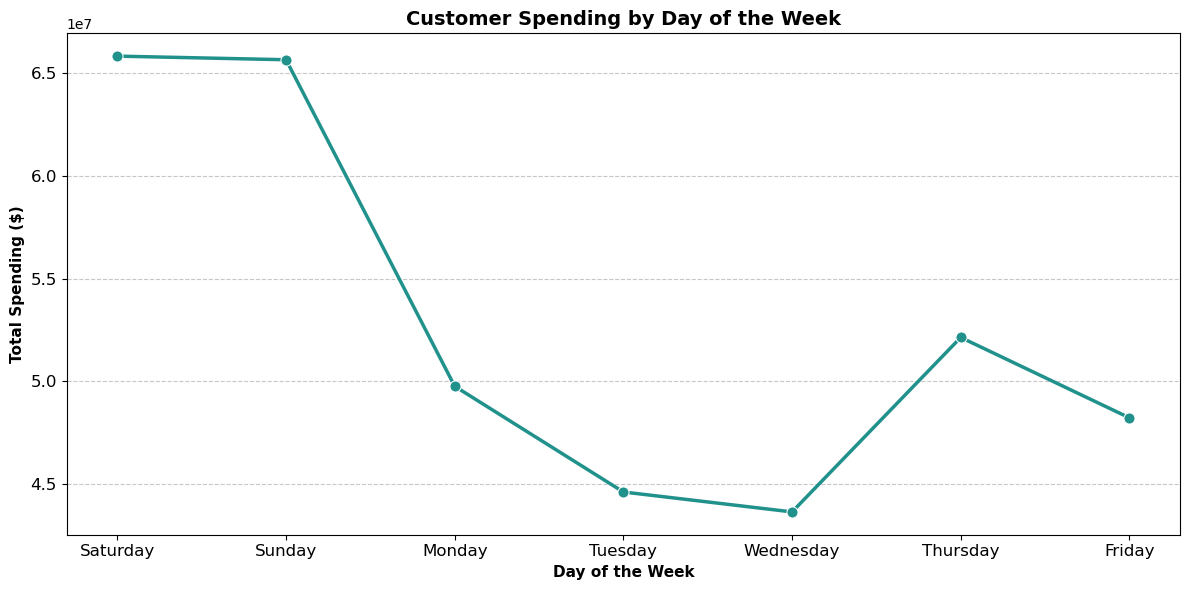

In [56]:
# Aggregate total spending per weekday
weekday_spending = df_final_analysis.groupby('order_weekday')['prices'].sum().reset_index()

# Define the correct order for weekdays (Saturday = 0, Friday = 6)
weekday_labels = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekday_spending['order_weekday'] = pd.Categorical(weekday_spending['order_weekday'], categories=range(7), ordered=True)

# Set the style and figure size
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_weekday', y='prices', data=weekday_spending, color='#21918c', marker='o', linewidth=2.5, markersize=8)

# Customize aesthetics
plt.title('Customer Spending by Day of the Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=11, fontweight='bold')
plt.ylabel('Total Spending ($)', fontsize=11, fontweight='bold')
plt.xticks(ticks=range(7), labels=weekday_labels, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines

# Save the figure as a high-quality PNG
plt.tight_layout()
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/customer_spending_by_weekday.png', dpi=300)

# Show the plot
plt.show()

## 3.5 Department with highest amount of orders

/var/folders/l6/kxjkdn9x2hz2slywnf_9gymm0000gp/T/ipykernel_78363/404054397.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_number', y='department', data=department_order_freq, palette='coolwarm')  # Using a pleasing color palette
/var/folders/l6/kxjkdn9x2hz2slywnf_9gymm0000gp/T/ipykernel_78363/404054397.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_number', y='department', data=department_order_freq, palette='coolwarm')


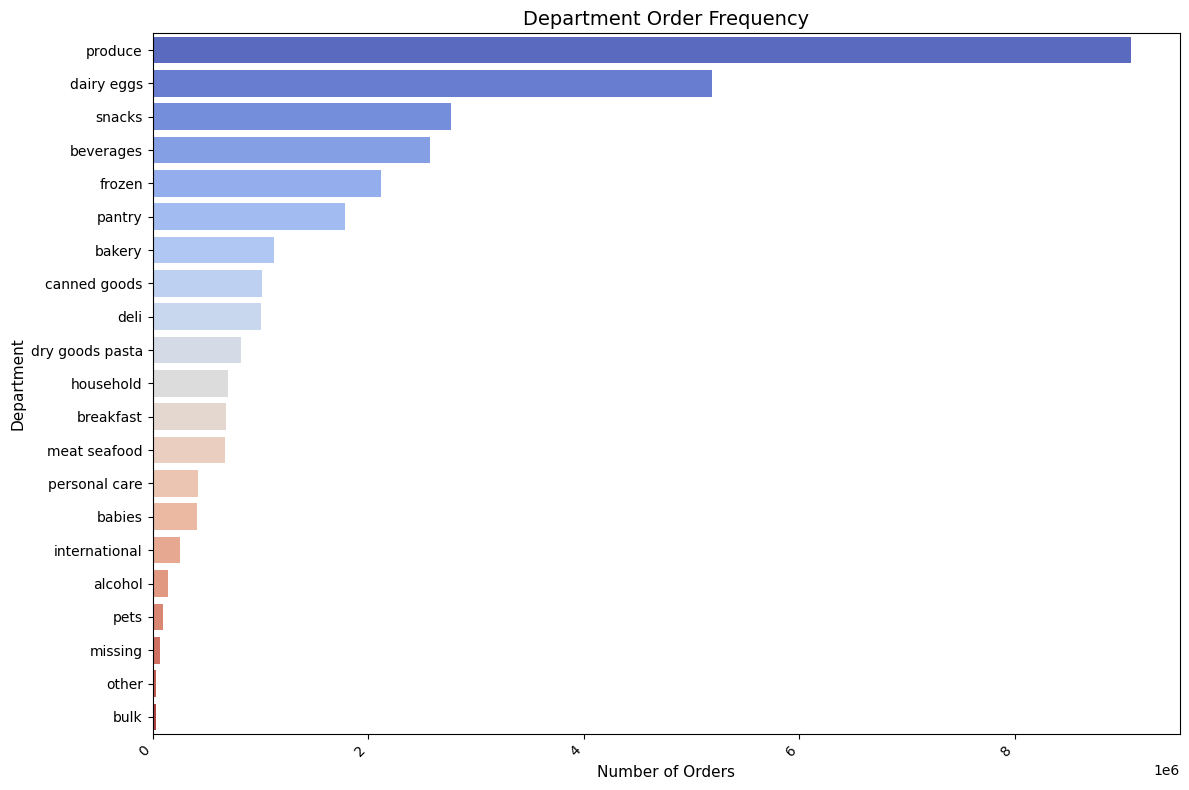

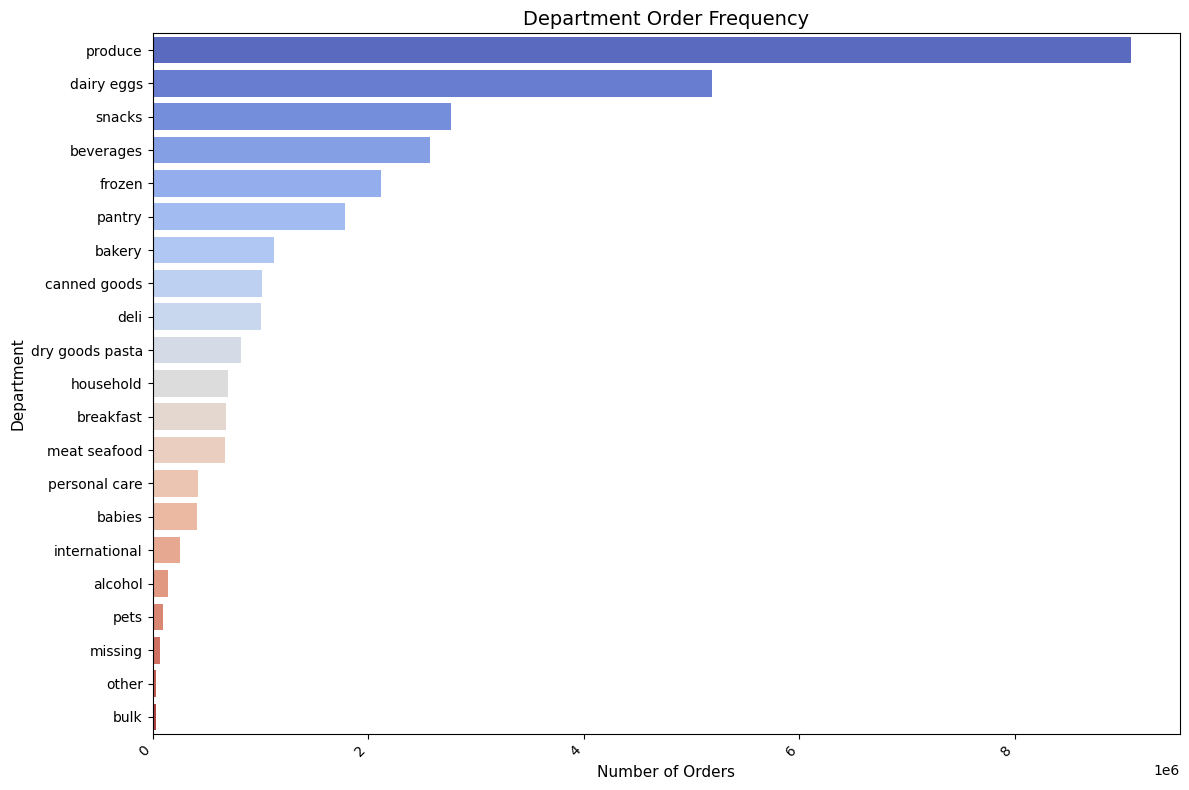

In [63]:
# First, we need to calculate the frequency of orders by department
department_order_freq = df_final_analysis.groupby('department')['order_number'].count().reset_index()

# Sort the departments by frequency of orders in descending order
department_order_freq = department_order_freq.sort_values('order_number', ascending=False)

# Plotting the department order frequency
plt.figure(figsize=(12, 8))
sns.barplot(x='order_number', y='department', data=department_order_freq, palette='coolwarm')  # Using a pleasing color palette

# Customize the plot
plt.title('Department Order Frequency', fontsize=14)
plt.xlabel('Number of Orders', fontsize=11)
plt.ylabel('Department', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Saving the visualization as PNG
plt.figure(figsize=(12, 8))
sns.barplot(x='order_number', y='department', data=department_order_freq, palette='coolwarm')
plt.title('Department Order Frequency', fontsize=14)
plt.xlabel('Number of Orders', fontsize=11)
plt.ylabel('Department', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the figure
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/department_order_frequency.png', format='png')

# Show the plot
plt.show()

In [182]:
# Count the rows with 'missing' or 'other' in the 'department' column
df_final_analysis['department'].isin(['missing', 'other']).sum()

99179

In [184]:
# Delete rows where 'department' is 'missing' or 'other'
df_final_analysis = df_final_analysis[~df_final_analysis['department'].isin(['missing', 'other'])]

In [186]:
# Count the rows with 'missing' or 'other' in the 'department' column
df_final_analysis['department'].isin(['missing', 'other']).sum()

0

/var/folders/l6/kxjkdn9x2hz2slywnf_9gymm0000gp/T/ipykernel_22023/3873525935.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_number', y='department', data=department_order_freq, palette=custom_palette)


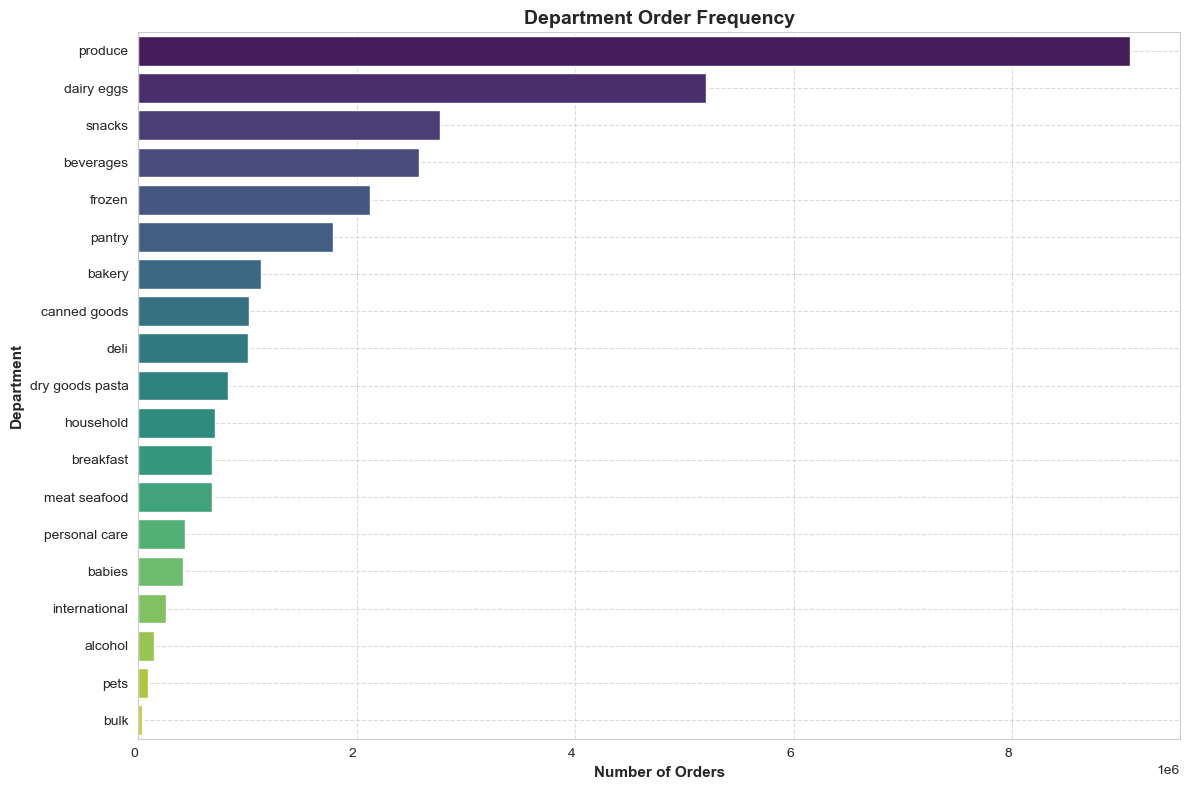

In [188]:
# First, we need to calculate the frequency of orders by department
department_order_freq = df_final_analysis.groupby('department')['order_number'].count().reset_index()

# Sort the departments by frequency of orders in descending order
department_order_freq = department_order_freq.sort_values('order_number', ascending=False)

# Define a custom color palette
custom_palette = sns.color_palette("viridis", len(department_order_freq))

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='order_number', y='department', data=department_order_freq, palette=custom_palette)

# Adding customizations to the plot
plt.title('Department Order Frequency', fontsize=14, fontweight='bold')
plt.xlabel('Number of Orders', fontsize=11, fontweight='bold')
plt.ylabel('Department', fontsize=11, fontweight='bold')
plt.xticks(rotation=0, ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.7)  # Add subtle gridlines
plt.tight_layout()

# Save the figure
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/department_order_frequency.png', format='png')

# Display the plot
plt.show()

## 3.6 Difference in Spending Habits of Loyalty Groups

<Figure size 1000x600 with 0 Axes>

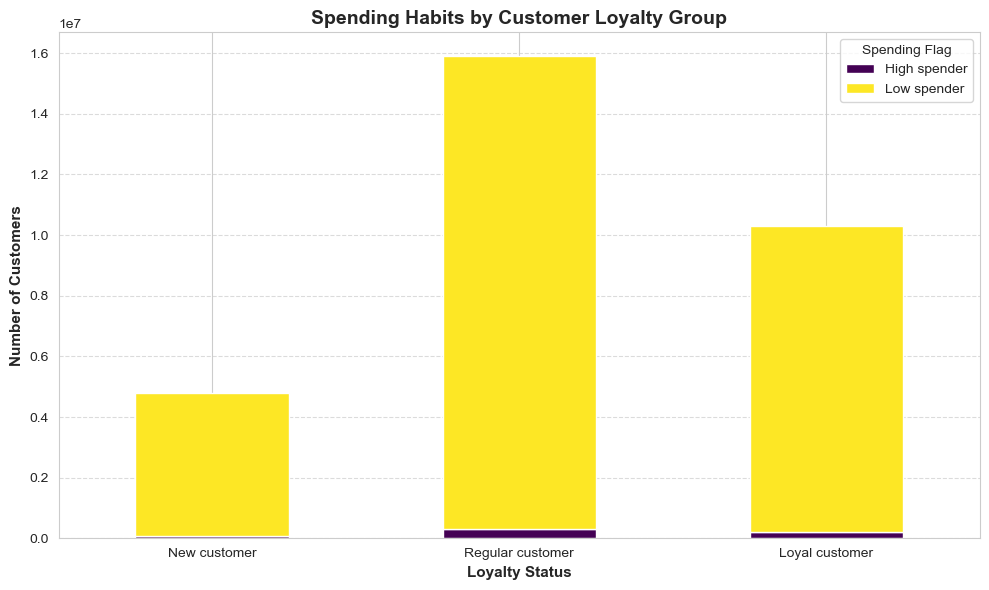

In [86]:
# Set plot style
sns.set_style("whitegrid")

# Define the correct order for loyalty groups
loyalty_order = ['New customer', 'Regular customer', 'Loyal customer']

# Create a crosstab to count occurrences of spending_flag within each loyalty group
loyalty_spending_crosstab = pd.crosstab(df_final_analysis['loyalty_flag'], df_final_analysis['spending_flag'])

# Reorder the index to match the desired sorting
loyalty_spending_crosstab = loyalty_spending_crosstab.loc[loyalty_order]

# Define the figure size
plt.figure(figsize=(10, 6))

# Create a stacked bar chart with the specified order
loyalty_spending_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Add labels and title with adjusted sizes
plt.title('Spending Habits by Customer Loyalty Group', fontsize=14, fontweight='bold')
plt.xlabel('Loyalty Status', fontsize=11, fontweight='bold')  # Adjusted to size 11
plt.ylabel('Number of Customers', fontsize=11, fontweight='bold')  # Adjusted to size 11
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Spending Flag', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines

# Adjust layout
plt.tight_layout()

# Save the visualization as PNG
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/spending_habits_by_loyalty.png', dpi=300)

# Show the plot
plt.show()

In [88]:
# Create a crosstab to count occurrences of spending_flag within each loyalty group
loyalty_spending_crosstab = pd.crosstab(df_final_analysis['loyalty_flag'], df_final_analysis['spending_flag'])

# Normalize the crosstab to get percentages (row-wise)
loyalty_spending_percentage = loyalty_spending_crosstab.div(loyalty_spending_crosstab.sum(axis=1), axis=0) * 100

# Reorder index to match the desired sorting
loyalty_order = ['New customer', 'Regular customer', 'Loyal customer']
loyalty_spending_percentage = loyalty_spending_percentage.loc[loyalty_order]

# Display the result
print(loyalty_spending_percentage)

spending_flag     High spender  Low spender
loyalty_flag                               
New customer          1.753840    98.246160
Regular customer      1.907404    98.092596
Loyal customer        2.109584    97.890416


<Figure size 1000x600 with 0 Axes>

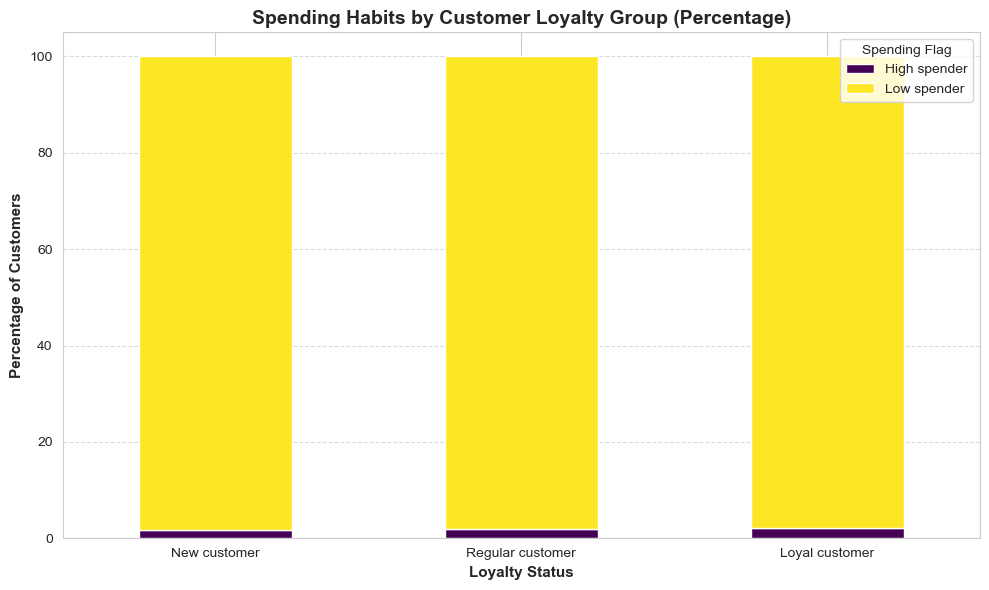

In [90]:
# Set plot style
sns.set_style("whitegrid")

# Define the correct order for loyalty groups
loyalty_order = ['New customer', 'Regular customer', 'Loyal customer']

# Create a crosstab and normalize to get percentages
loyalty_spending_crosstab = pd.crosstab(
    df_final_analysis['loyalty_flag'], 
    df_final_analysis['spending_flag'], 
    normalize='index'
) * 100  # Convert to percentage

# Reorder the index to match the desired sorting
loyalty_spending_crosstab = loyalty_spending_crosstab.loc[loyalty_order]

# Define figure size
plt.figure(figsize=(10, 6))

# Create a stacked bar chart with percentages
loyalty_spending_crosstab.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6), 
    colormap='viridis'
)

# Add labels and title with adjusted sizes
plt.title('Spending Habits by Customer Loyalty Group (Percentage)', fontsize=14, fontweight='bold')
plt.xlabel('Loyalty Status', fontsize=11, fontweight='bold')  
plt.ylabel('Percentage of Customers', fontsize=11, fontweight='bold')  
plt.xticks(rotation=0)  
plt.legend(title='Spending Flag', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines

# Adjust layout
plt.tight_layout()

# Save the visualization as PNG
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/spending_habits_by_loyalty_percentage.png', dpi=300)

# Show the plot
plt.show()


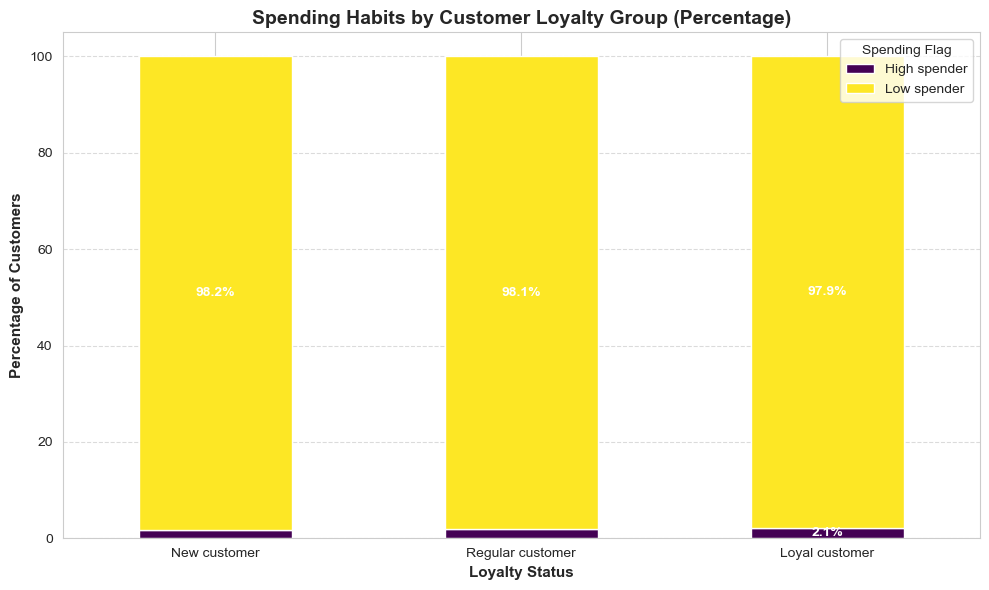

In [92]:
# Set plot style
sns.set_style("whitegrid")

# Define the correct order for loyalty groups
loyalty_order = ['New customer', 'Regular customer', 'Loyal customer']

# Create a crosstab and normalize to get percentages
loyalty_spending_crosstab = pd.crosstab(
    df_final_analysis['loyalty_flag'], 
    df_final_analysis['spending_flag'], 
    normalize='index'
) * 100  # Convert to percentage

# Reorder the index to match the desired sorting
loyalty_spending_crosstab = loyalty_spending_crosstab.loc[loyalty_order]

# Define figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Create a stacked bar chart with percentages
loyalty_spending_crosstab.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6), 
    colormap='viridis',
    ax=ax
)

# Add percentage labels to bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 2:  # Only display labels for meaningful values
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        ax.text(x, y, f'{height:.1f}%', ha='center', va='center', fontsize=10, fontweight='bold', color='white')

# Add labels and title with adjusted sizes
plt.title('Spending Habits by Customer Loyalty Group (Percentage)', fontsize=14, fontweight='bold')
plt.xlabel('Loyalty Status', fontsize=11, fontweight='bold')  
plt.ylabel('Percentage of Customers', fontsize=11, fontweight='bold')  
plt.xticks(rotation=0)  
plt.legend(title='Spending Flag', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines

# Adjust layout
plt.tight_layout()

# Save the visualization as PNG
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/spending_habits_by_loyalty_percentage.png', dpi=300)

# Show the plot
plt.show()

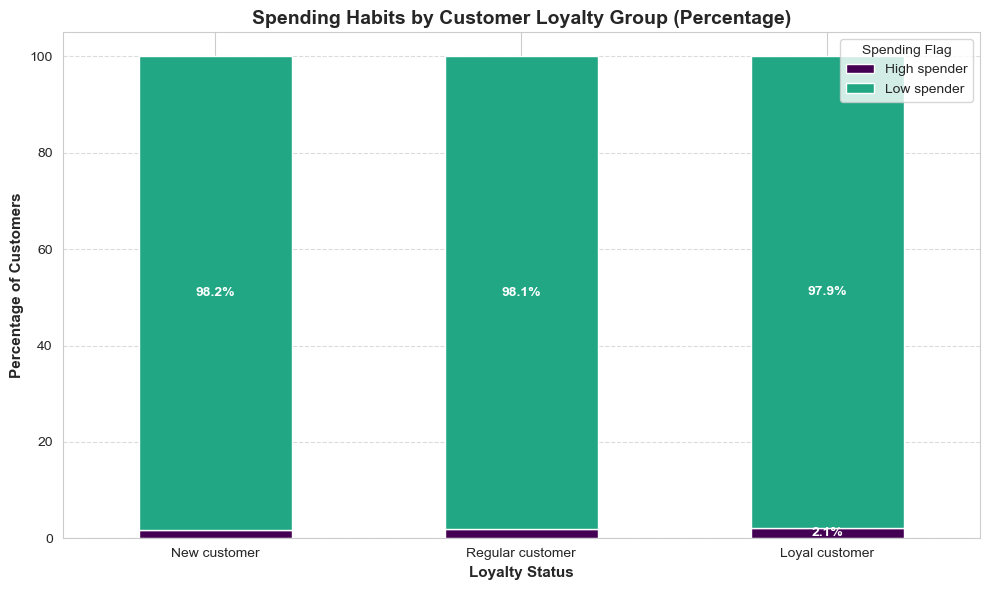

In [94]:
# Set plot style
sns.set_style("whitegrid")

# Define the correct order for loyalty groups
loyalty_order = ['New customer', 'Regular customer', 'Loyal customer']

# Create a crosstab and normalize to get percentages
loyalty_spending_crosstab = pd.crosstab(
    df_final_analysis['loyalty_flag'], 
    df_final_analysis['spending_flag'], 
    normalize='index'
) * 100  # Convert to percentage

# Reorder the index to match the desired sorting
loyalty_spending_crosstab = loyalty_spending_crosstab.loc[loyalty_order]

# Define custom colors, ensuring "Low spender" is green while using Viridis palette for others
custom_colors = {
    'Low spender': '#22a785',  # Green shade from Viridis
    'High spender': '#440154'  # Dark purple from Viridis
}

# Define figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Create a stacked bar chart with the custom color mapping
loyalty_spending_crosstab.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6), 
    color=[custom_colors[label] for label in loyalty_spending_crosstab.columns], 
    ax=ax
)

# Add percentage labels to bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 2:  # Only display labels for meaningful values
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        ax.text(x, y, f'{height:.1f}%', ha='center', va='center', fontsize=10, fontweight='bold', color='white')

# Add labels and title with adjusted sizes
plt.title('Spending Habits by Customer Loyalty Group (Percentage)', fontsize=14, fontweight='bold')
plt.xlabel('Loyalty Status', fontsize=11, fontweight='bold')  
plt.ylabel('Percentage of Customers', fontsize=11, fontweight='bold')  
plt.xticks(rotation=0)  
plt.legend(title='Spending Flag', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines

# Adjust layout
plt.tight_layout()

# Save the visualization as PNG
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/spending_habits_by_loyalty_percentage.png', dpi=300)

# Show the plot
plt.show()

## 3.7 Loyalty Groups & Price Range Buying Behavior

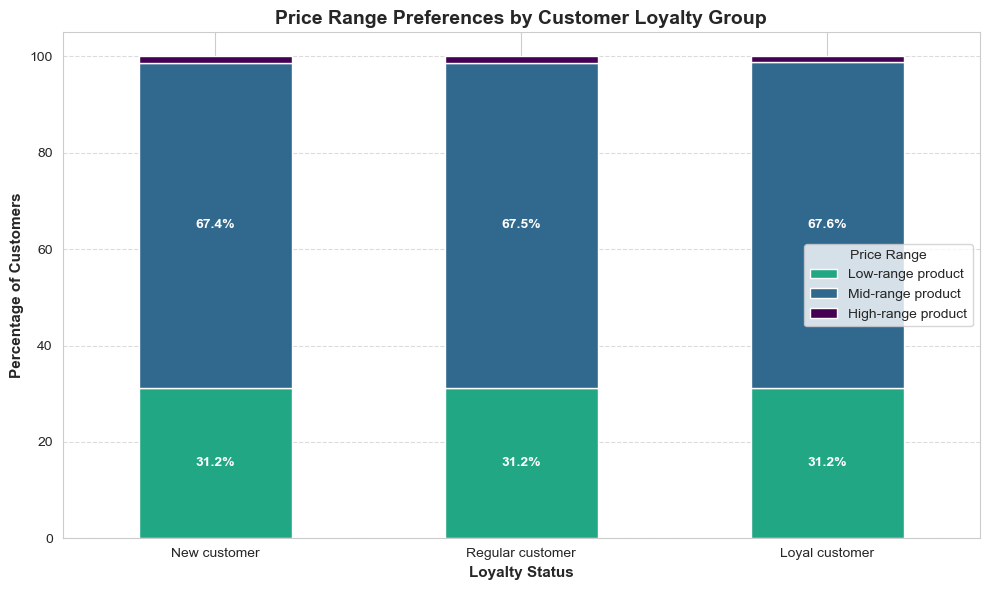

In [101]:
# Set plot style
sns.set_style("whitegrid")

# Define the correct order for loyalty groups
loyalty_order = ['New customer', 'Regular customer', 'Loyal customer']

# Define the correct order for price range categories
price_range_order = ['Low-range product', 'Mid-range product', 'High-range product']

# Create a crosstab and normalize to get percentages
loyalty_price_crosstab = pd.crosstab(
    df_final_analysis['loyalty_flag'], 
    df_final_analysis['price_range'], 
    normalize='index'
) * 100  # Convert to percentage

# Reorder the index and columns to match the desired sorting
loyalty_price_crosstab = loyalty_price_crosstab.loc[loyalty_order, price_range_order]

# Define custom colors for the price ranges using the Viridis palette
custom_colors = {
    'Low-range product': '#22a785',  # Green shade from Viridis
    'Mid-range product': '#31688e',  # Blue shade from Viridis
    'High-range product': '#440154'  # Dark purple shade from Viridis
}

# Define figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Create a stacked bar chart with the custom color mapping
loyalty_price_crosstab.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6), 
    color=[custom_colors[label] for label in loyalty_price_crosstab.columns], 
    ax=ax
)

# Add percentage labels to bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 2:  # Only display labels for meaningful values
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        ax.text(x, y, f'{height:.1f}%', ha='center', va='center', fontsize=10, fontweight='bold', color='white')

# Add labels and title with adjusted sizes
plt.title('Price Range Preferences by Customer Loyalty Group', fontsize=14, fontweight='bold')
plt.xlabel('Loyalty Status', fontsize=11, fontweight='bold')  
plt.ylabel('Percentage of Customers', fontsize=11, fontweight='bold')  
plt.xticks(rotation=0)  
plt.legend(title='Price Range', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines

# Adjust layout
plt.tight_layout()

# Save the visualization as PNG
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/price_range_by_loyalty.png', dpi=300)

# Show the plot
plt.show()

## 3.8 Loyalty Groups & Order Frequency Behavior

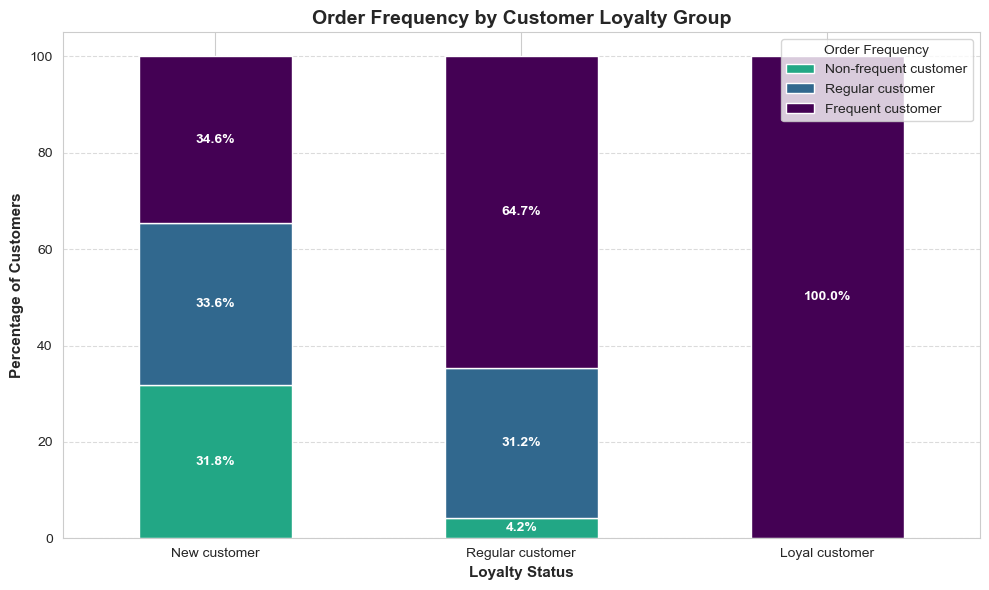

In [104]:
# Set plot style
sns.set_style("whitegrid")

# Define the correct order for loyalty groups
loyalty_order = ['New customer', 'Regular customer', 'Loyal customer']

# Define the correct order for order frequency categories
order_freq_order = ['Non-frequent customer', 'Regular customer', 'Frequent customer']

# Create a crosstab and normalize to get percentages
loyalty_order_freq_crosstab = pd.crosstab(
    df_final_analysis['loyalty_flag'], 
    df_final_analysis['order_frequency_flag'], 
    normalize='index'
) * 100  # Convert to percentage

# Reorder the index and columns to match the desired sorting
loyalty_order_freq_crosstab = loyalty_order_freq_crosstab.loc[loyalty_order, order_freq_order]

# Define custom colors for the order frequency categories using the Viridis palette
custom_colors = {
    'Non-frequent customer': '#22a785',  # Green shade from Viridis
    'Regular customer': '#31688e',  # Blue shade from Viridis
    'Frequent customer': '#440154'  # Dark purple shade from Viridis
}

# Define figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Create a stacked bar chart with the custom color mapping
loyalty_order_freq_crosstab.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6), 
    color=[custom_colors[label] for label in loyalty_order_freq_crosstab.columns], 
    ax=ax
)

# Add percentage labels to bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 2:  # Only display labels for meaningful values
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        ax.text(x, y, f'{height:.1f}%', ha='center', va='center', fontsize=10, fontweight='bold', color='white')

# Add labels and title with adjusted sizes
plt.title('Order Frequency by Customer Loyalty Group', fontsize=14, fontweight='bold')
plt.xlabel('Loyalty Status', fontsize=11, fontweight='bold')  
plt.ylabel('Percentage of Customers', fontsize=11, fontweight='bold')  
plt.xticks(rotation=0)  
plt.legend(title='Order Frequency', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines

# Adjust layout
plt.tight_layout()

# Save the visualization as PNG
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/order_frequency_by_loyalty.png', dpi=300)

# Show the plot
plt.show()

## 3.9 Spending Behavior By Region

<Figure size 1200x600 with 0 Axes>

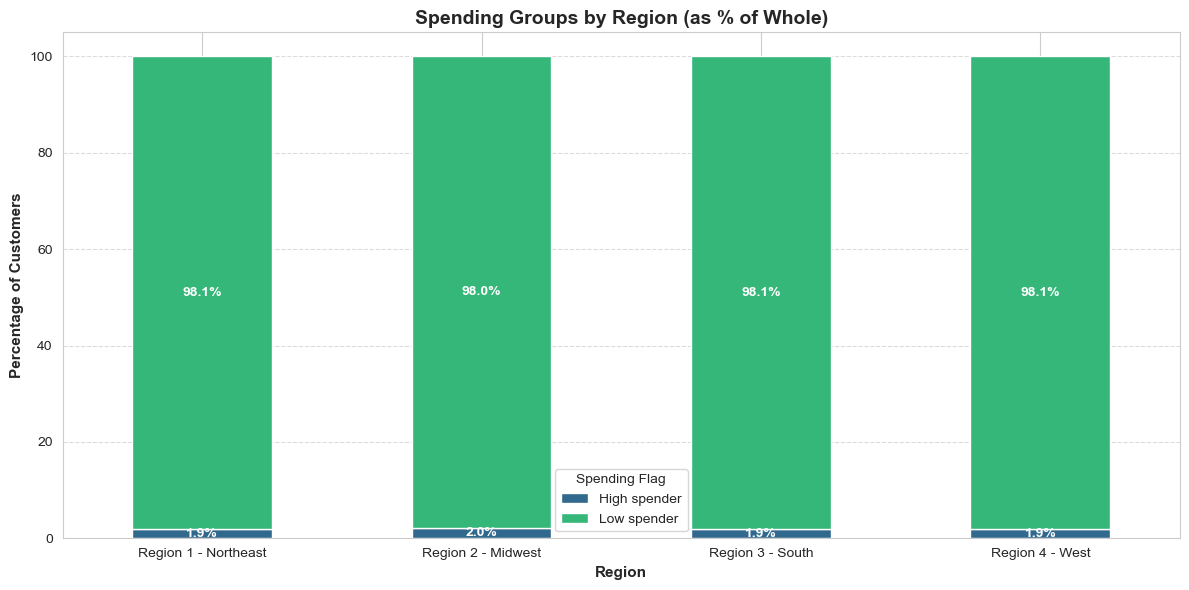

In [16]:
# Set style
sns.set_style("whitegrid")

# Create a crosstab of spending_flag by region (counts)
region_spending_crosstab = pd.crosstab(df_final_analysis['region'], df_final_analysis['spending_flag'])

# Convert counts to percentages (normalize along rows)
region_spending_percent = region_spending_crosstab.div(region_spending_crosstab.sum(axis=1), axis=0) * 100

# Define figure size
plt.figure(figsize=(12, 6))

# Define custom viridis color palette with a specific color for "Low spender"
colors = sns.color_palette("viridis", len(region_spending_percent.columns))

# Plot stacked bar chart
ax = region_spending_percent.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

# Add percentage labels on bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='center', fontsize=10, color='white', weight='bold')

# Set titles and labels
plt.title('Spending Groups by Region (as % of Whole)', fontsize=14, fontweight='bold')
plt.xlabel('Region', fontsize=11, fontweight='bold')
plt.ylabel('Percentage of Customers', fontsize=11, fontweight='bold')

# Format x-axis labels
plt.xticks(rotation=0)

# Add legend
plt.legend(title='Spending Flag', fontsize=10)

# Add grid lines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optimize layout
plt.tight_layout()

# Save the figure as PNG
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/spending_groups_by_region_percent.png', dpi=300)

# Show the plot
plt.show()

## 3.10 Order Frequency by Region

<Figure size 1200x600 with 0 Axes>

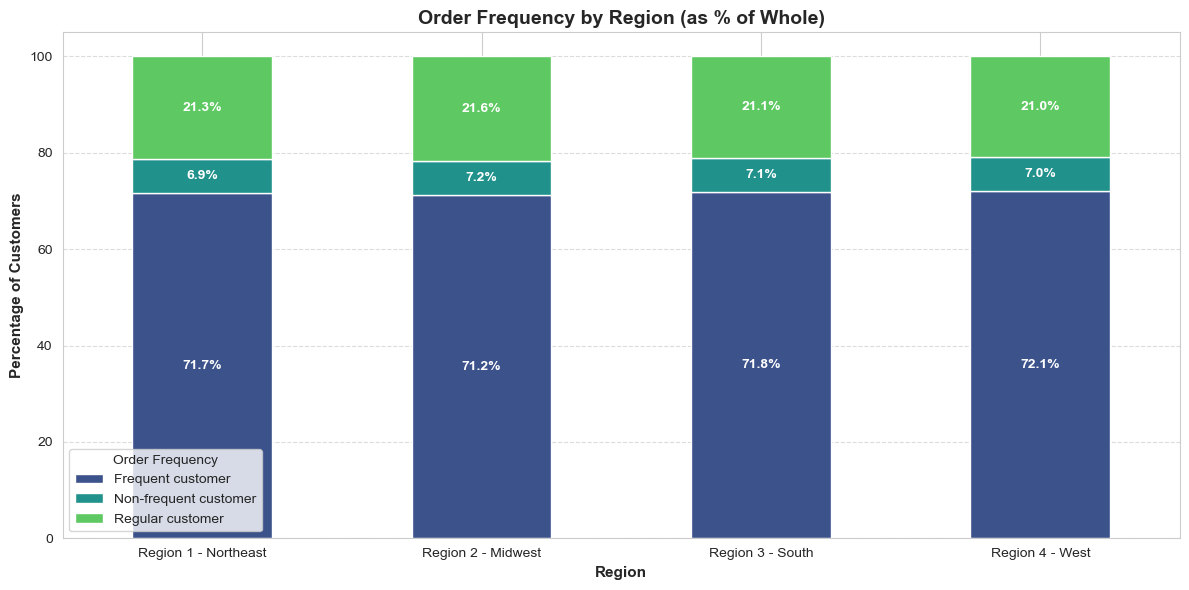

In [19]:
# Set style
sns.set_style("whitegrid")

# Create a crosstab of order_frequency_flag by region (counts)
region_order_crosstab = pd.crosstab(df_final_analysis['region'], df_final_analysis['order_frequency_flag'])

# Convert counts to percentages (normalize along rows)
region_order_percent = region_order_crosstab.div(region_order_crosstab.sum(axis=1), axis=0) * 100

# Define figure size
plt.figure(figsize=(12, 6))

# Define custom viridis color palette
colors = sns.color_palette("viridis", len(region_order_percent.columns))

# Plot stacked bar chart
ax = region_order_percent.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

# Add percentage labels on bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='center', fontsize=10, color='white', weight='bold')

# Set titles and labels
plt.title('Order Frequency by Region (as % of Whole)', fontsize=14, fontweight='bold')
plt.xlabel('Region', fontsize=11, fontweight='bold')
plt.ylabel('Percentage of Customers', fontsize=11, fontweight='bold')

# Format x-axis labels
plt.xticks(rotation=0)

# Add legend
plt.legend(title='Order Frequency', fontsize=10)

# Add grid lines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optimize layout
plt.tight_layout()

# Save the figure as PNG
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/order_frequency_by_region_percent.png', dpi=300)

# Show the plot
plt.show()

## 3.11 Spending Behavior by Age Group

<Figure size 1000x600 with 0 Axes>

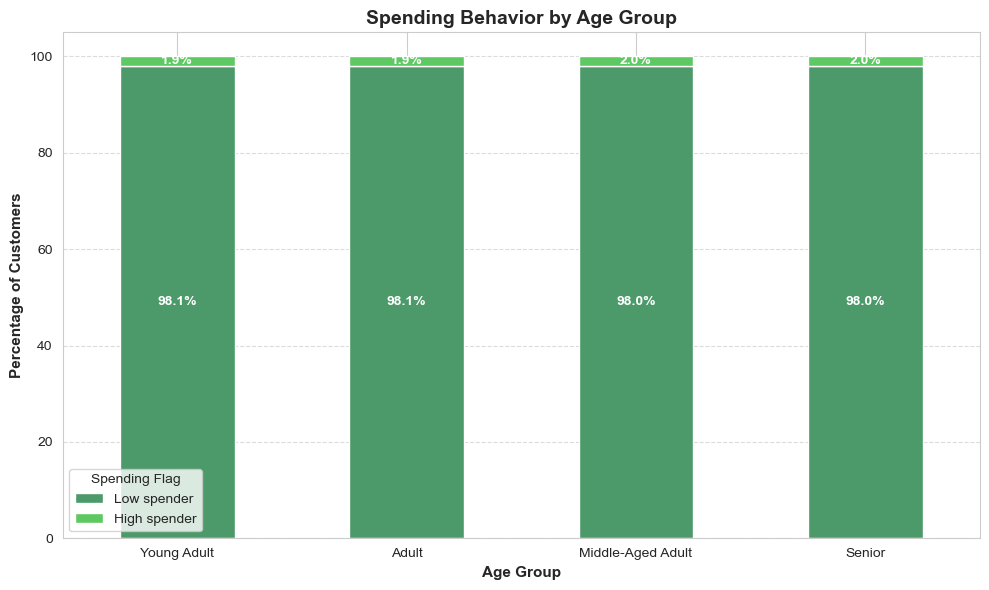

In [24]:
# Set plot style
sns.set_style("whitegrid")

# Define the correct order for age groups from youngest to oldest
age_order = ['Young Adult', 'Adult', 'Middle-Aged Adult', 'Senior']

# Create a crosstab to count occurrences of spending_flag within each age group
age_spending_crosstab = pd.crosstab(df_final_analysis['age_group'], df_final_analysis['spending_flag'], normalize='index') * 100

# Reorder the index to match the desired sorting
age_spending_crosstab = age_spending_crosstab.loc[age_order]

# Define the figure size
plt.figure(figsize=(10, 6))

# Define the correct order for spending groups
spending_order = ['Low spender', 'High spender']

# Define colors (keeping "Low spender" green for consistency)
custom_colors = ['#4c9a6a', sns.color_palette("viridis", 3)[2]]

# Create a stacked bar chart
ax = age_spending_crosstab[spending_order].plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_colors)

# Add percentage labels on the bars
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Add labels and title
plt.title('Spending Behavior by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=11, fontweight='bold')
plt.ylabel('Percentage of Customers', fontsize=11, fontweight='bold')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Spending Flag', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines

# Adjust layout
plt.tight_layout()

# Save the visualization as PNG
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/spending_behavior_by_age_group_percent.png', dpi=300)

# Show the plot
plt.show()

## 3.12 Loyalty status by Age Group

<Figure size 1000x600 with 0 Axes>

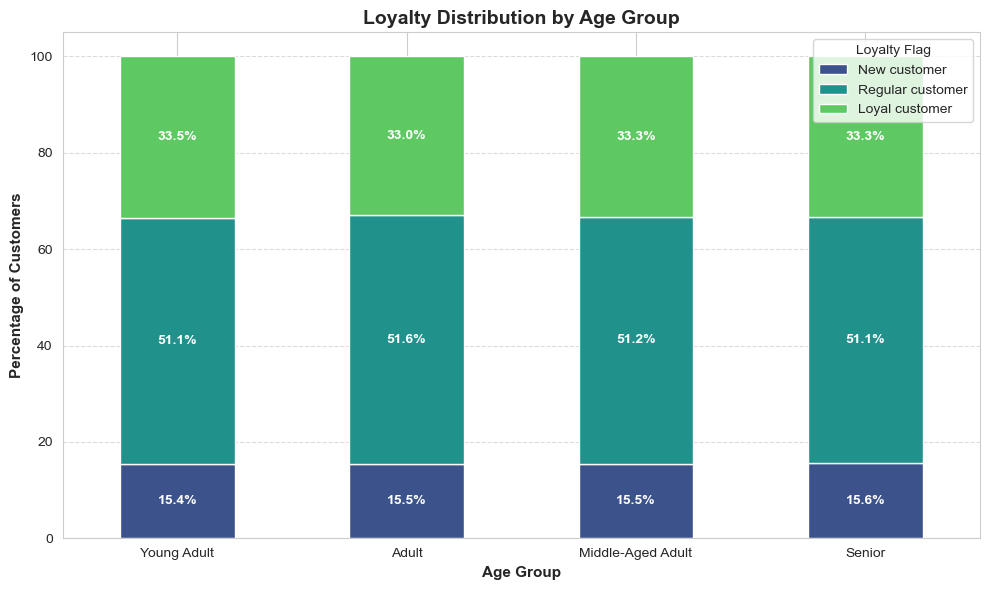

In [27]:
# Set plot style
sns.set_style("whitegrid")

# Define the correct order for age groups from youngest to oldest
age_order = ['Young Adult', 'Adult', 'Middle-Aged Adult', 'Senior']

# Define the correct order for loyalty groups
loyalty_order = ['New customer', 'Regular customer', 'Loyal customer']

# Create a crosstab to count occurrences of loyalty_flag within each age group (as percentages)
age_loyalty_crosstab = pd.crosstab(df_final_analysis['age_group'], df_final_analysis['loyalty_flag'], normalize='index') * 100

# Reorder the index to match the desired sorting
age_loyalty_crosstab = age_loyalty_crosstab.loc[age_order][loyalty_order]

# Define colors for each loyalty group
custom_colors = sns.color_palette("viridis", len(loyalty_order))

# Define figure size
plt.figure(figsize=(10, 6))

# Create stacked bar chart
ax = age_loyalty_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_colors)

# Add percentage labels on the bars
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Add labels and title
plt.title('Loyalty Distribution by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=11, fontweight='bold')
plt.ylabel('Percentage of Customers', fontsize=11, fontweight='bold')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Loyalty Flag', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines

# Adjust layout
plt.tight_layout()

# Save the visualization as PNG
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/loyalty_distribution_by_age_group_percent.png', dpi=300)

# Show the plot
plt.show()

## 3.13 Relation between Age Group and Order Frequency

<Figure size 1000x600 with 0 Axes>

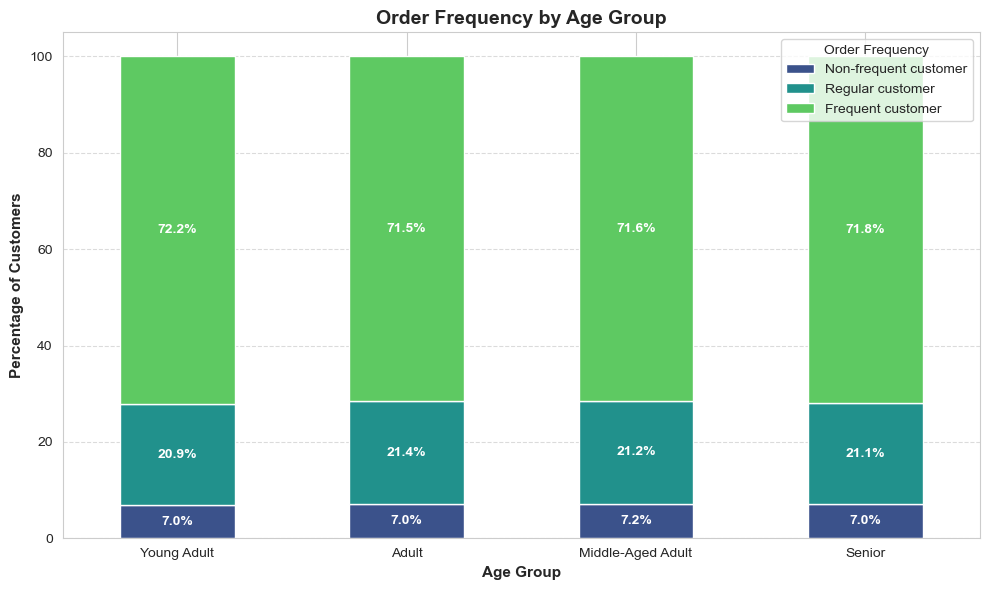

In [36]:
# Set plot style
sns.set_style("whitegrid")

# Define the correct order for age groups (youngest to oldest)
age_order = ['Young Adult', 'Adult', 'Middle-Aged Adult', 'Senior']

# Define the correct order for order frequency categories
frequency_order = ['Non-frequent customer', 'Regular customer', 'Frequent customer']

# Create a crosstab to calculate percentages for order frequency within each age group
age_frequency_crosstab = pd.crosstab(df_final_analysis['age_group'], df_final_analysis['order_frequency_flag'], normalize='index') * 100

# Reorder the index to match the desired sorting
age_frequency_crosstab = age_frequency_crosstab.loc[age_order][frequency_order]

# Define colors for the order frequency categories
custom_colors = sns.color_palette("viridis", len(frequency_order))

# Define figure size
plt.figure(figsize=(10, 6))

# Create stacked bar chart
ax = age_frequency_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_colors)

# Add percentage labels on the bars
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Add labels and title
plt.title('Order Frequency by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=11, fontweight='bold')
plt.ylabel('Percentage of Customers', fontsize=11, fontweight='bold')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Order Frequency', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines

# Adjust layout
plt.tight_layout()

# Save the visualization as PNG
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/order_frequency_by_age_group_percent.png', dpi=300)

# Show the plot
plt.show()

## 3.14 Family Status Group Percentage of Whole

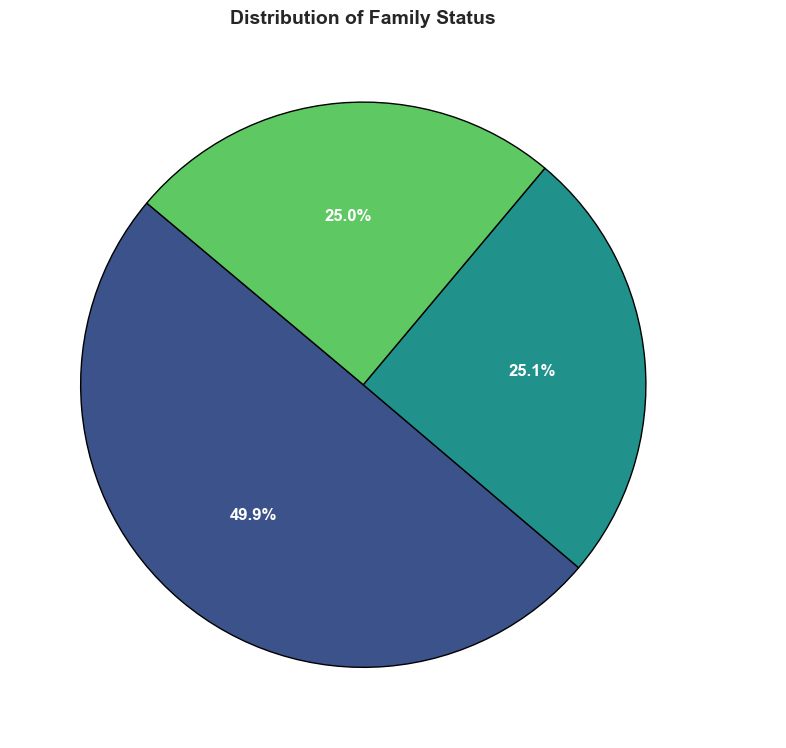

In [57]:
# Set plot style
sns.set_style("whitegrid")

# Count occurrences of each family status category
family_status_counts = df_final_analysis['family_status'].value_counts(normalize=True) * 100  # Convert to percentages

# Define color palette
custom_colors = sns.color_palette("viridis", len(family_status_counts))

# Define figure size
plt.figure(figsize=(8, 8))

# Create pie chart with labels and percentages
wedges, texts, autotexts = plt.pie(
    family_status_counts,
    labels=family_status_counts.index,  # Labels for family status
    autopct='%1.1f%%',  # Show percentage on pie slices
    colors=custom_colors,
    startangle=140,  # Rotate for better visibility
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Add black edges
    textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'white'}  # White font for percentages
)

# Set title
plt.title('Distribution of Family Status', fontsize=14, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Save the visualization as PNG
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/family_status_distribution_pie.png', dpi=300)

# Show the plot
plt.show()


## 3.15 Spending Habits by Family Status

<Figure size 1000x600 with 0 Axes>

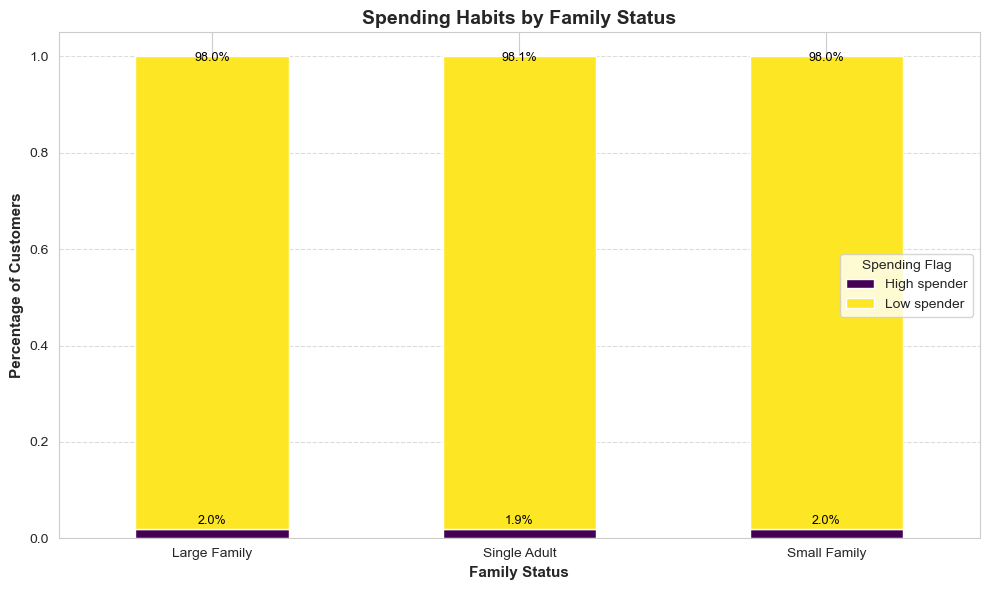

In [64]:
# Set plot style
sns.set_style("whitegrid")

# Create a crosstab to count occurrences of spending_flag within each family_status group
spending_family_crosstab = pd.crosstab(df_final_analysis['family_status'], df_final_analysis['spending_flag'], normalize='index')

# Define the figure size
plt.figure(figsize=(10, 6))

# Create a stacked bar chart with the specified order and a 'viridis' color palette
spending_family_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Add labels and title with adjusted sizes
plt.title('Spending Habits by Family Status', fontsize=14, fontweight='bold')
plt.xlabel('Family Status', fontsize=11, fontweight='bold')  # Adjusted to size 11
plt.ylabel('Percentage of Customers', fontsize=11, fontweight='bold')  # Adjusted to size 11
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Spending Flag', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines

# Display the percentages on the bars with dark color
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Only display percentages for non-zero bars
        plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height() + 0.01, f'{height * 100:.1f}%', 
                       ha='center', fontsize=9, color='black')

# Adjust layout
plt.tight_layout()

# Save the visualization as PNG
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/spending_habits_by_family_status_percent.png', dpi=300)

# Show the plot
plt.show()

## 3.16 Order Frequency by Family Status

<Figure size 1000x600 with 0 Axes>

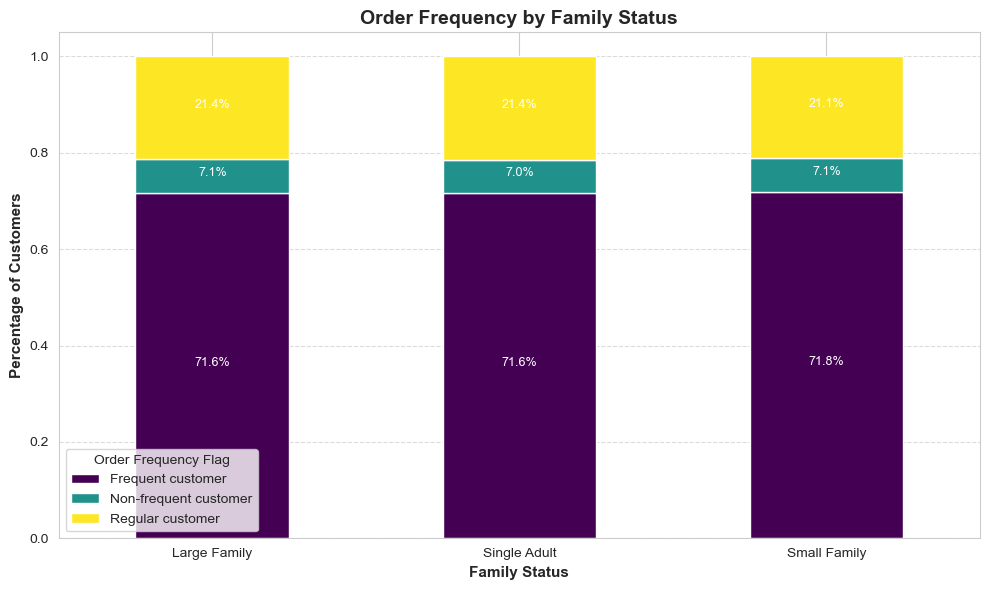

In [73]:

# Set plot style
sns.set_style("whitegrid")

# Create a crosstab to count occurrences of order_frequency_flag within each family_status group
order_frequency_family_crosstab = pd.crosstab(df_final_analysis['family_status'], df_final_analysis['order_frequency_flag'], normalize='index')

# Define the figure size
plt.figure(figsize=(10, 6))

# Create a stacked bar chart with the specified order and 'viridis' color palette
ax = order_frequency_family_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Add labels and title with adjusted sizes
plt.title('Order Frequency by Family Status', fontsize=14, fontweight='bold')
plt.xlabel('Family Status', fontsize=11, fontweight='bold')  # Adjusted to size 11
plt.ylabel('Percentage of Customers', fontsize=11, fontweight='bold')  # Adjusted to size 11
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Order Frequency Flag', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines

# Display the percentages on the bars with white font
for i, p in enumerate(ax.patches):
    height = p.get_height()
    if height > 0:  # Only display percentages for non-zero bars
        # Calculate the y position for the text (this is the cumulative height up to this point)
        y_position = p.get_y() + height / 2
        # Display percentage inside bars with white font
        ax.text(p.get_x() + p.get_width() / 2, y_position, f'{height * 100:.1f}%', 
                ha='center', fontsize=9, color='white')

# Adjust layout
plt.tight_layout()

# Save the visualization as PNG
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/order_frequency_by_family_status_percent.png', dpi=300)

# Show the plot
plt.show()

## 3.17 Department Order Frequency by Family Status

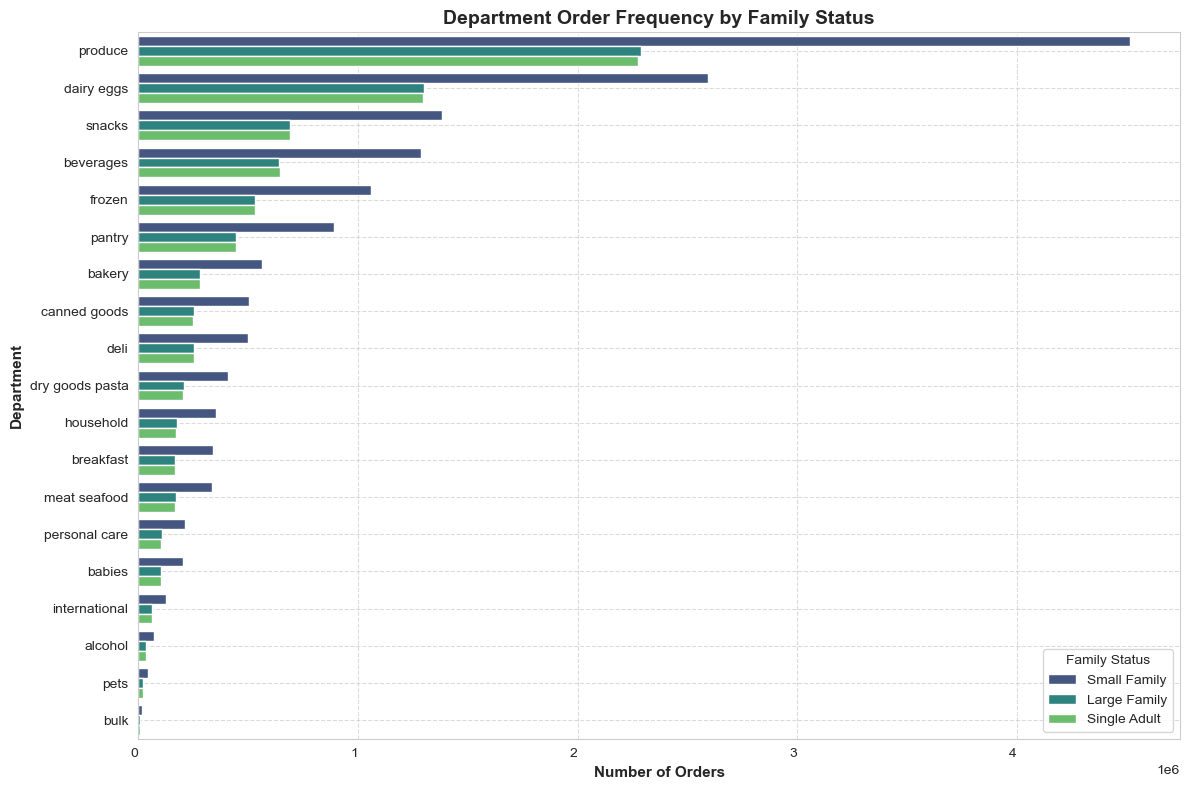

In [190]:
# First, we need to calculate the frequency of orders by department and family status
department_family_order_freq = df_final_analysis.groupby(['department', 'family_status'])['order_number'].count().reset_index()

# Sort the departments by frequency of orders in descending order
department_family_order_freq = department_family_order_freq.sort_values('order_number', ascending=False)

# Define a custom color palette
custom_palette = sns.color_palette("viridis", len(department_family_order_freq['family_status'].unique()))

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='order_number', y='department', hue='family_status', data=department_family_order_freq, palette=custom_palette)

# Adding customizations to the plot
plt.title('Department Order Frequency by Family Status', fontsize=14, fontweight='bold')
plt.xlabel('Number of Orders', fontsize=11, fontweight='bold')
plt.ylabel('Department', fontsize=11, fontweight='bold')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Family Status', fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)  # Add subtle gridlines
plt.tight_layout()

# Save the figure
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/department_order_frequency_by_family_status.png', format='png')

# Display the plot
plt.show()

## 3.18 Department Order Frequency by Family Status Heatmap


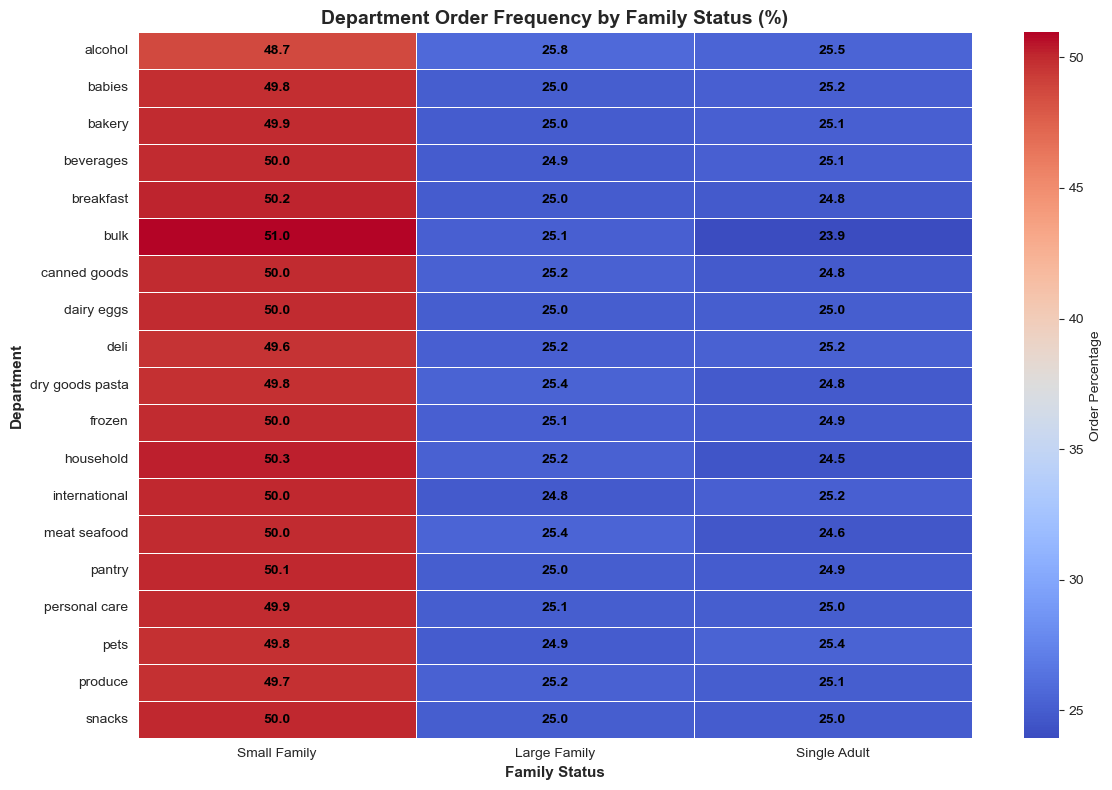

In [192]:
# First, we need to calculate the frequency of orders by department and family status
department_family_order_freq = df_final_analysis.groupby(['department', 'family_status'])['order_number'].count().reset_index()

# Calculate total orders in each department
total_orders_by_department = df_final_analysis.groupby('department')['order_number'].count().reset_index()
total_orders_by_department = total_orders_by_department.rename(columns={'order_number': 'total_orders'})

# Merge the total order counts back to the department_family_order_freq dataframe
department_family_order_freq = department_family_order_freq.merge(total_orders_by_department, on='department')

# Normalize the order counts by dividing by the total orders in each department and multiplying by 100 for percentage
department_family_order_freq['order_percentage'] = (department_family_order_freq['order_number'] / department_family_order_freq['total_orders']) * 100

# Pivot the data to get departments as rows and family_status as columns
department_family_pivot = department_family_order_freq.pivot(index='department', columns='family_status', values='order_percentage')

# Sort the columns based on family status order (optional, adjust as needed)
family_status_order = ['Small Family', 'Large Family', 'Single Adult']  # Modify this based on your specific categories
department_family_pivot = department_family_pivot[family_status_order]

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(department_family_pivot, annot=True, fmt=".1f", cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Order Percentage'}, annot_kws={"size": 10, "weight": "bold", 'color': 'black'})

# Add title and labels
plt.title('Department Order Frequency by Family Status (%)', fontsize=14, fontweight='bold')
plt.xlabel('Family Status', fontsize=11, fontweight='bold')
plt.ylabel('Department', fontsize=11, fontweight='bold')

# Adjust the layout to make sure everything fits
plt.tight_layout()

# Save the figure
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/department_order_frequency_by_family_status_heatmap.png', format='png')

# Show the plot
plt.show()


## 3.19 Department Order Frequency by Age Group

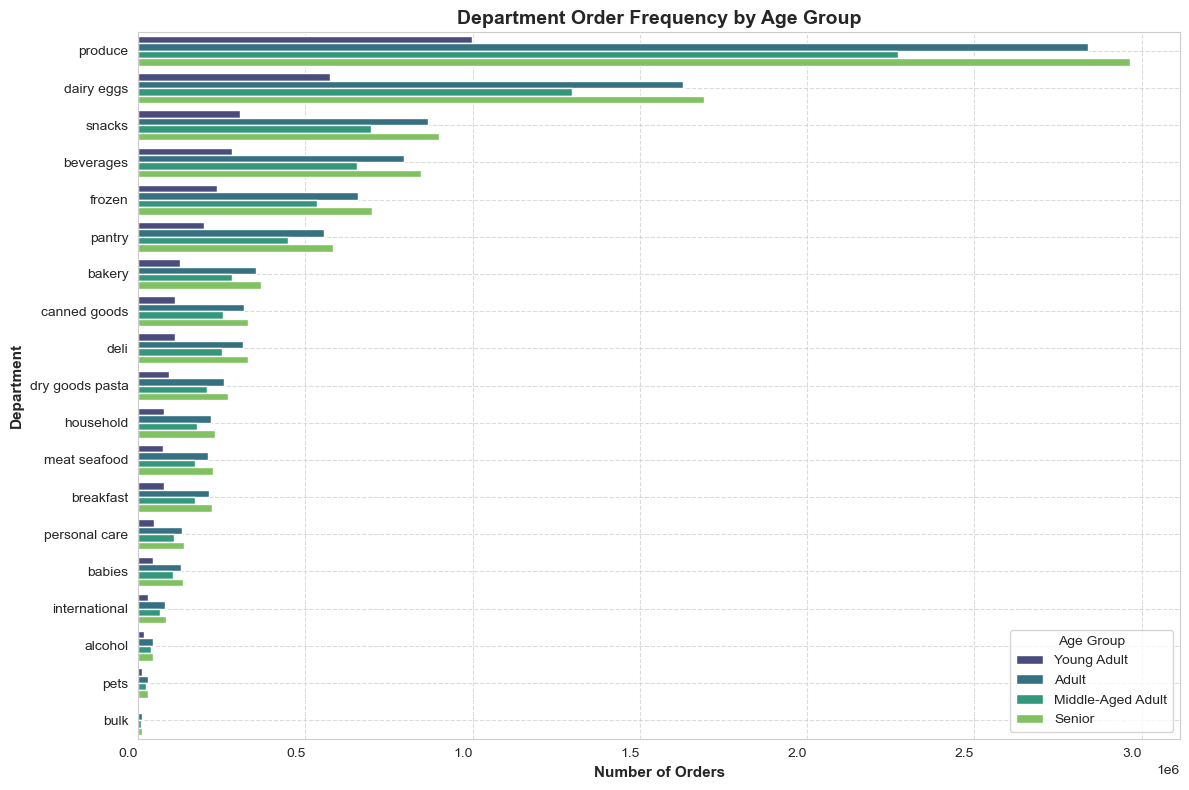

In [194]:
# Define the custom order for age groups from youngest to oldest
age_group_order = ['Young Adult', 'Adult', 'Middle-Aged Adult', 'Senior']

# First, we need to calculate the frequency of orders by department and age group
department_age_order_freq = df_final_analysis.groupby(['department', 'age_group'])['order_number'].count().reset_index()

# Sort the departments by frequency of orders in descending order
department_age_order_freq = department_age_order_freq.sort_values('order_number', ascending=False)

# Define a custom color palette
custom_palette = sns.color_palette("viridis", len(age_group_order))

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='order_number', y='department', hue='age_group', data=department_age_order_freq,
            palette=custom_palette, hue_order=age_group_order)

# Adding customizations to the plot
plt.title('Department Order Frequency by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Number of Orders', fontsize=11, fontweight='bold')
plt.ylabel('Department', fontsize=11, fontweight='bold')
plt.xticks(rotation=0, ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.7)  # Add subtle gridlines

# Adjusting the legend position to the bottom-right corner and ensuring the order of age groups is from youngest to oldest
plt.legend(title='Age Group', fontsize=10, loc='lower right', bbox_to_anchor=(1, 0))

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/department_order_frequency_by_age_group.png', format='png')

# Display the plot
plt.show()

## 3.20 Department Order Frequency by Age Group (normalized)

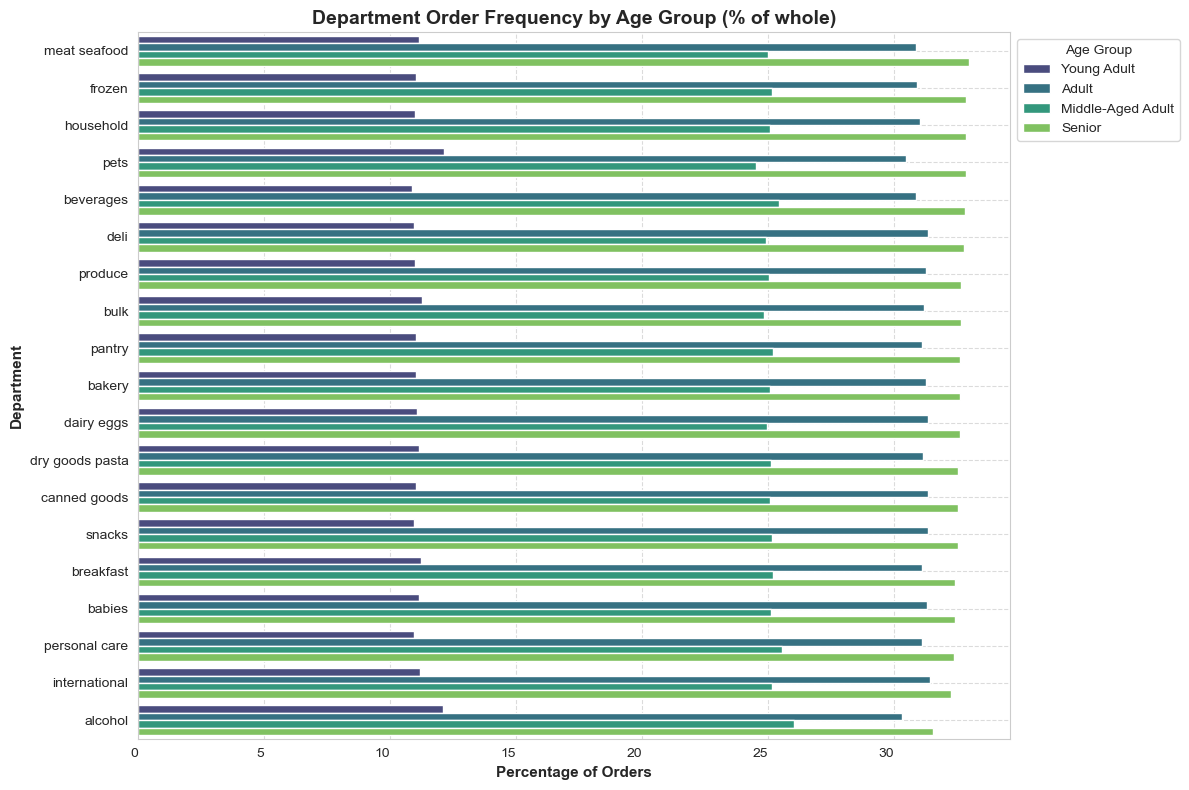

In [198]:
# Define the custom order for age groups from youngest to oldest
age_group_order = ['Young Adult', 'Adult', 'Middle-Aged Adult', 'Senior']

# First, we need to calculate the frequency of orders by department and age group
department_age_order_freq = df_final_analysis.groupby(['department', 'age_group'])['order_number'].count().reset_index()

# Calculate total orders in each department
total_orders_by_department = df_final_analysis.groupby('department')['order_number'].count().reset_index()
total_orders_by_department = total_orders_by_department.rename(columns={'order_number': 'total_orders'})

# Merge the total order counts back to the department_age_order_freq dataframe
department_age_order_freq = department_age_order_freq.merge(total_orders_by_department, on='department')

# Normalize the order counts by dividing by the total orders in each department and multiplying by 100 for percentage
department_age_order_freq['order_percentage'] = (department_age_order_freq['order_number'] / department_age_order_freq['total_orders']) * 100

# Sort the departments by order percentage in descending order
department_age_order_freq = department_age_order_freq.sort_values('order_percentage', ascending=False)

# Define a custom color palette
custom_palette = sns.color_palette("viridis", len(age_group_order))

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='order_percentage', y='department', hue='age_group', data=department_age_order_freq,
            palette=custom_palette, hue_order=age_group_order)

# Adding customizations to the plot
plt.title('Department Order Frequency by Age Group (% of whole)', fontsize=14, fontweight='bold')
plt.xlabel('Percentage of Orders', fontsize=11, fontweight='bold')
plt.ylabel('Department', fontsize=11, fontweight='bold')
plt.xticks(rotation=0, ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.7)  # Add subtle gridlines

# Adjusting the legend position to be outside the plot (on the right)
plt.legend(title='Age Group', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/department_order_frequency_by_age_group_percentage.png', format='png')

# Display the plot
plt.show()

In [118]:
# Define the custom order for age groups from youngest to oldest
age_group_order = ['Young Adult', 'Adult', 'Middle-Aged Adult', 'Senior']

# First, we need to calculate the frequency of orders by department and age group
department_age_order_freq = df_final_analysis.groupby(['department', 'age_group'])['order_number'].count().reset_index()

# Calculate total orders in each department
total_orders_by_department = df_final_analysis.groupby('department')['order_number'].count().reset_index()
total_orders_by_department = total_orders_by_department.rename(columns={'order_number': 'total_orders'})

# Merge the total order counts back to the department_age_order_freq dataframe
department_age_order_freq = department_age_order_freq.merge(total_orders_by_department, on='department')

# Normalize the order counts by dividing by the total orders in each department and multiplying by 100 for percentage
department_age_order_freq['order_percentage'] = (department_age_order_freq['order_number'] / department_age_order_freq['total_orders']) * 100

# Sort the departments by order percentage in descending order
department_age_order_freq = department_age_order_freq.sort_values('order_percentage', ascending=False)

# Adjust pandas settings to ensure no truncation of departments
pd.set_option('display.max_rows', None)  # This will display all rows
pd.set_option('display.max_columns', None)  # This will display all columns
pd.set_option('display.width', None)  # Prevent truncation of columns
pd.set_option('display.max_colwidth', None)  # Avoid truncation of long column values

# Display the table with the desired columns
table_data = department_age_order_freq[['department', 'age_group', 'order_percentage']]

# Show the table
print(table_data)

         department          age_group  order_percentage
54     meat seafood             Senior         32.963981
42           frozen             Senior         32.864607
46        household             Senior         32.860952
74             pets             Senior         32.850158
14        beverages             Senior         32.842872
34             deli             Senior         32.771056
78          produce             Senior         32.672209
22             bulk             Senior         32.671669
66           pantry             Senior         32.643335
10           bakery             Senior         32.637290
30       dairy eggs             Senior         32.606319
38  dry goods pasta             Senior         32.555684
26     canned goods             Senior         32.555426
82           snacks             Senior         32.545223
18        breakfast             Senior         32.422006
6            babies             Senior         32.412669
70    personal care            

## 3.21 Heatmap Department Order Frequency by Age Group


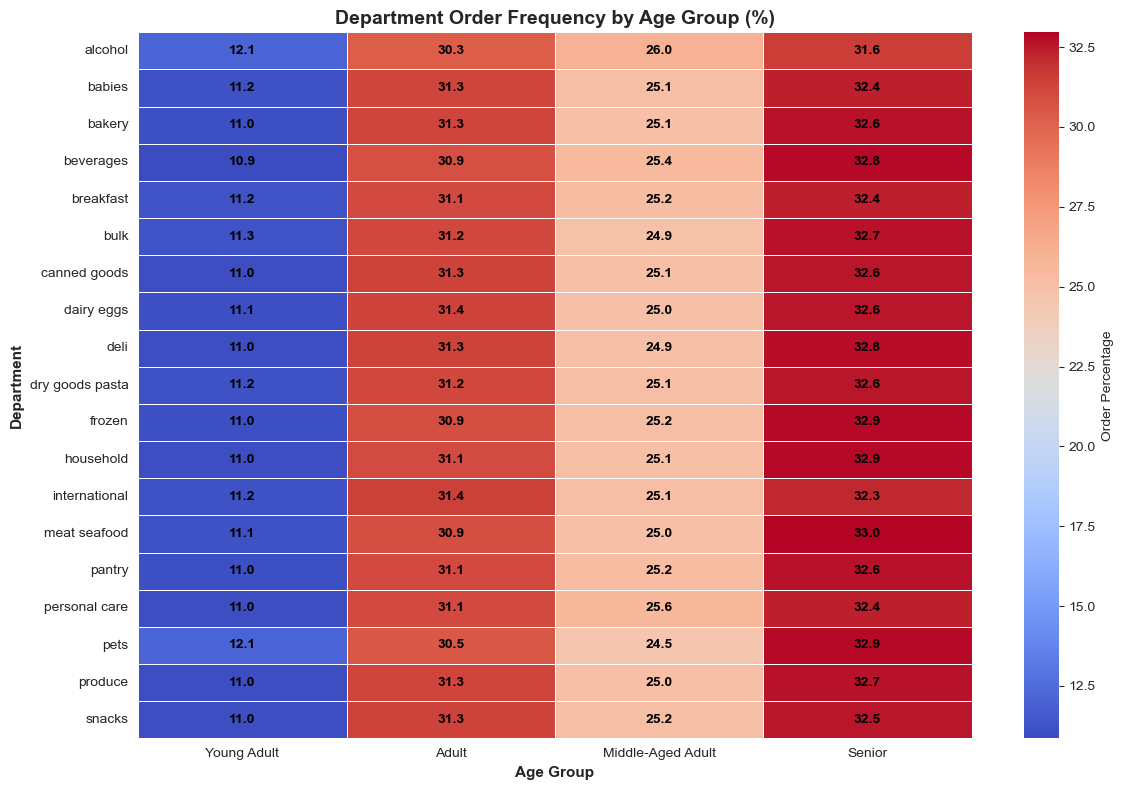

In [202]:
# Define the custom order for age groups from youngest to oldest
age_group_order = ['Young Adult', 'Adult', 'Middle-Aged Adult', 'Senior']

# First, we need to calculate the frequency of orders by department and age group
department_age_order_freq = df_final_analysis.groupby(['department', 'age_group'])['order_number'].count().reset_index()

# Calculate total orders in each department
total_orders_by_department = df_final_analysis.groupby('department')['order_number'].count().reset_index()
total_orders_by_department = total_orders_by_department.rename(columns={'order_number': 'total_orders'})

# Merge the total order counts back to the department_age_order_freq dataframe
department_age_order_freq = department_age_order_freq.merge(total_orders_by_department, on='department')

# Normalize the order counts by dividing by the total orders in each department and multiplying by 100 for percentage
department_age_order_freq['order_percentage'] = (department_age_order_freq['order_number'] / department_age_order_freq['total_orders']) * 100

# Pivot the data to get departments as rows and age_groups as columns
department_age_pivot = department_age_order_freq.pivot(index='department', columns='age_group', values='order_percentage')

# Reorder the columns by the custom age group order
department_age_pivot = department_age_pivot[age_group_order]

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(department_age_pivot, annot=True, fmt=".1f", cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Order Percentage'}, annot_kws={"size": 10, "weight": "bold", 'color': 'black'})

# Add title and labels
plt.title('Department Order Frequency by Age Group (%)', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=11, fontweight='bold')
plt.ylabel('Department', fontsize=11, fontweight='bold')

# Adjust the layout to make sure everything fits
plt.tight_layout()

# Save the figure
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/department_order_frequency_by_age_group_heatmap.png', format='png')


# Show the plot
plt.show()

## 3.22 Order Frequency by Income Group


<Figure size 1000x600 with 0 Axes>

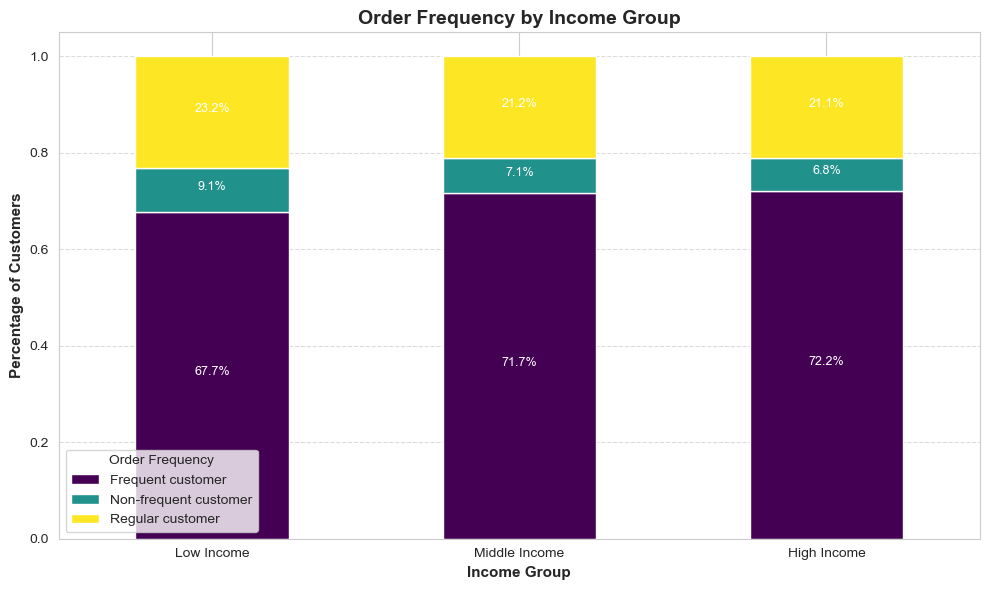

In [135]:
# Set plot style
sns.set_style("whitegrid")

# Create a crosstab to count occurrences of order_frequency_flag within each income group
order_frequency_income_crosstab = pd.crosstab(df_final_analysis['income_group'], df_final_analysis['order_frequency_flag'], normalize='index')

# Ensure income groups are sorted correctly (Low income, Middle income, High income)
income_group_order = ['Low Income', 'Middle Income', 'High Income']
order_frequency_income_crosstab = order_frequency_income_crosstab.reindex(income_group_order)

# Define the figure size
plt.figure(figsize=(10, 6))

# Create a stacked bar chart with the specified order and 'viridis' color palette
ax = order_frequency_income_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Add labels and title with adjusted sizes
plt.title('Order Frequency by Income Group', fontsize=14, fontweight='bold')
plt.xlabel('Income Group', fontsize=11, fontweight='bold')
plt.ylabel('Percentage of Customers', fontsize=11, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title='Order Frequency', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the percentages on the bars with white font
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        y_position = p.get_y() + height / 2  # y position for the text
        ax.text(p.get_x() + p.get_width() / 2, y_position, f'{height * 100:.1f}%', 
                ha='center', fontsize=9, color='white')

# Adjust layout
plt.tight_layout()

# Save the visualization as PNG
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/order_frequency_by_income_group_percent.png', dpi=300)

# Show the plot
plt.show()

## 3.23 Spending Behavior by Income Group

<Figure size 1000x600 with 0 Axes>

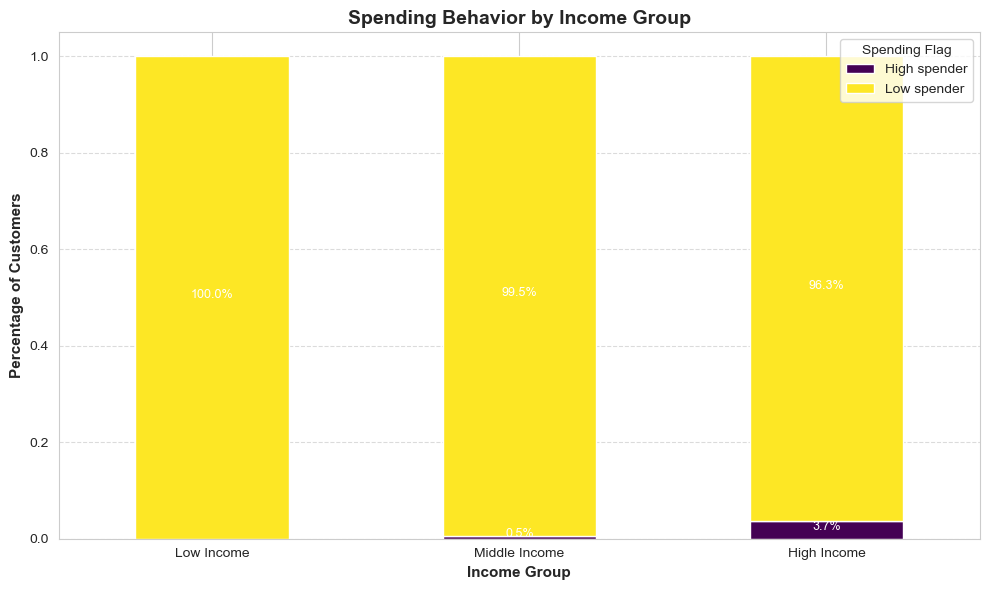

In [138]:
# Set plot style
sns.set_style("whitegrid")

# Create a crosstab to count occurrences of spending_flag within each income group
spending_income_crosstab = pd.crosstab(df_final_analysis['income_group'], df_final_analysis['spending_flag'], normalize='index')

# Ensure income groups are sorted correctly (Low income, Middle income, High income)
income_group_order = ['Low Income', 'Middle Income', 'High Income']
spending_income_crosstab = spending_income_crosstab.reindex(income_group_order)

# Define the figure size
plt.figure(figsize=(10, 6))

# Create a stacked bar chart with the specified order and 'viridis' color palette
ax = spending_income_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Add labels and title with adjusted sizes
plt.title('Spending Behavior by Income Group', fontsize=14, fontweight='bold')
plt.xlabel('Income Group', fontsize=11, fontweight='bold')
plt.ylabel('Percentage of Customers', fontsize=11, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title='Spending Flag', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the percentages on the bars with white font
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        y_position = p.get_y() + height / 2  # y position for the text
        ax.text(p.get_x() + p.get_width() / 2, y_position, f'{height * 100:.1f}%', 
                ha='center', fontsize=9, color='white')

# Adjust layout
plt.tight_layout()

# Save the visualization as PNG
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/spending_behavior_by_income_group_percent.png', dpi=300)

# Show the plot
plt.show()


## 3.24 Department Order Frequency by Income Group


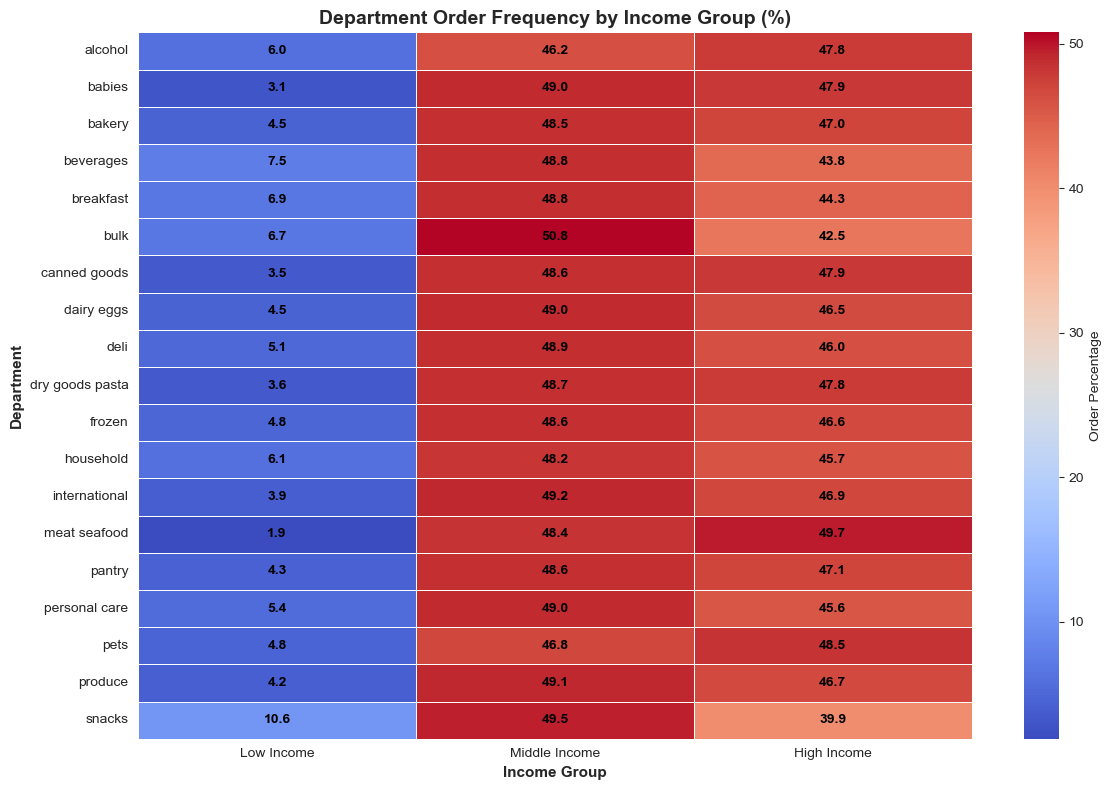

In [204]:
# Define the custom order for income groups
income_group_order = ['Low Income', 'Middle Income', 'High Income']

# First, we need to calculate the frequency of orders by department and income group
department_income_order_freq = df_final_analysis.groupby(['department', 'income_group'])['order_number'].count().reset_index()

# Calculate total orders in each department
total_orders_by_department = df_final_analysis.groupby('department')['order_number'].count().reset_index()
total_orders_by_department = total_orders_by_department.rename(columns={'order_number': 'total_orders'})

# Merge the total order counts back to the department_income_order_freq dataframe
department_income_order_freq = department_income_order_freq.merge(total_orders_by_department, on='department')

# Normalize the order counts by dividing by the total orders in each department and multiplying by 100 for percentage
department_income_order_freq['order_percentage'] = (department_income_order_freq['order_number'] / department_income_order_freq['total_orders']) * 100

# Pivot the data to get departments as rows and income_groups as columns
department_income_pivot = department_income_order_freq.pivot(index='department', columns='income_group', values='order_percentage')

# Reorder the columns by the custom income group order
department_income_pivot = department_income_pivot[income_group_order]

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(department_income_pivot, annot=True, fmt=".1f", cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Order Percentage'}, annot_kws={"size": 10, "weight": "bold", 'color': 'black'})

# Add title and labels
plt.title('Department Order Frequency by Income Group (%)', fontsize=14, fontweight='bold')
plt.xlabel('Income Group', fontsize=11, fontweight='bold')
plt.ylabel('Department', fontsize=11, fontweight='bold')

# Adjust the layout to make sure everything fits
plt.tight_layout()

# Save the figure
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/department_order_frequency_by_income_group_heatmap.png', format='png')

# Show the plot
plt.show()

## 3.25 Pet Owners by Region

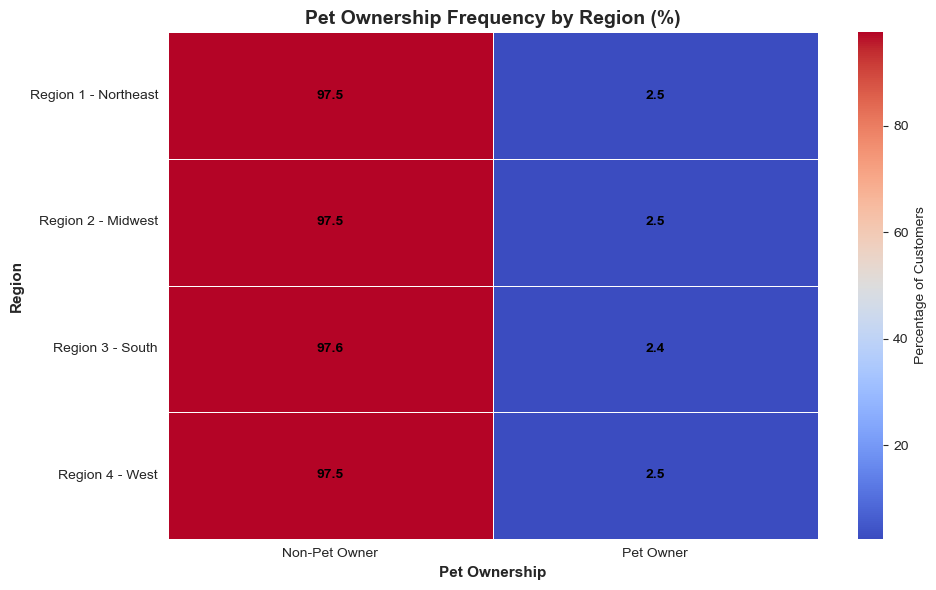

In [206]:
# Define the custom order for pet owners
pet_owner_order = ['Non-Pet Owner', 'Pet Owner']  # Adjust if different categories exist

# Calculate the frequency of pet owners by region
pet_owner_region_freq = df_final_analysis.groupby(['region', 'pet_owner'])['order_number'].count().reset_index()

# Calculate total customers in each region
total_by_region = df_final_analysis.groupby('region')['order_number'].count().reset_index()
total_by_region = total_by_region.rename(columns={'order_number': 'total_customers'})

# Merge total customers back to the pet_owner_region_freq DataFrame
pet_owner_region_freq = pet_owner_region_freq.merge(total_by_region, on='region')

# Convert counts to percentages
pet_owner_region_freq['percentage'] = (pet_owner_region_freq['order_number'] / pet_owner_region_freq['total_customers']) * 100

# Pivot the data: rows = regions, columns = pet ownership categories, values = percentages
pet_owner_region_pivot = pet_owner_region_freq.pivot(index='region', columns='pet_owner', values='percentage')

# Ensure correct column order
pet_owner_region_pivot = pet_owner_region_pivot[pet_owner_order]

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pet_owner_region_pivot, annot=True, fmt=".1f", cmap='coolwarm', linewidths=0.5, 
            cbar_kws={'label': 'Percentage of Customers'}, annot_kws={"size": 10, "weight": "bold", 'color': 'black'})

# Add title and labels
plt.title('Pet Ownership Frequency by Region (%)', fontsize=14, fontweight='bold')
plt.xlabel('Pet Ownership', fontsize=11, fontweight='bold')
plt.ylabel('Region', fontsize=11, fontweight='bold')

# Adjust layout for clarity
plt.tight_layout()

# Save the figure
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/pet_ownership_frequency_by_region_heatmap.png', format='png')

# Show the plot
plt.show()

## 3.26 Product Preference by Region


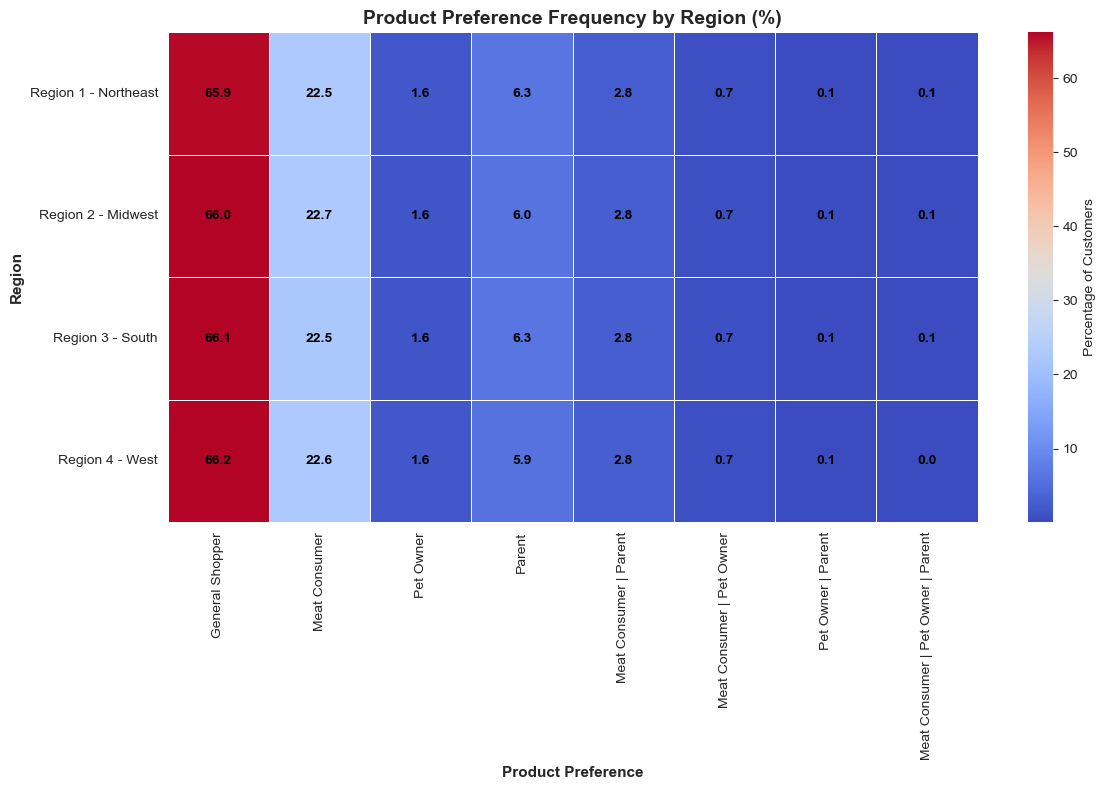

In [169]:
# Define the custom order for product preferences (adjust as needed)
product_preference_order = df_final_analysis['product_preference'].unique()

# Calculate the frequency of product preference by region
product_region_freq = df_final_analysis.groupby(['region', 'product_preference'])['order_number'].count().reset_index()

# Calculate total customers in each region
total_by_region = df_final_analysis.groupby('region')['order_number'].count().reset_index()
total_by_region = total_by_region.rename(columns={'order_number': 'total_customers'})

# Merge total customers back to the product_region_freq DataFrame
product_region_freq = product_region_freq.merge(total_by_region, on='region')

# Convert counts to percentages
product_region_freq['percentage'] = (product_region_freq['order_number'] / product_region_freq['total_customers']) * 100

# Pivot the data: rows = regions, columns = product preferences, values = percentages
product_region_pivot = product_region_freq.pivot(index='region', columns='product_preference', values='percentage')

# Ensure correct column order
product_region_pivot = product_region_pivot[product_preference_order]

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(product_region_pivot, annot=True, fmt=".1f", cmap='coolwarm', linewidths=0.5, 
            cbar_kws={'label': 'Percentage of Customers'}, annot_kws={"size": 10, "weight": "bold", 'color': 'black'})

# Add title and labels
plt.title('Product Preference Frequency by Region (%)', fontsize=14, fontweight='bold')
plt.xlabel('Product Preference', fontsize=11, fontweight='bold')
plt.ylabel('Region', fontsize=11, fontweight='bold')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Adjust layout for clarity
plt.tight_layout()

# Save the figure
plt.savefig('/Users/xxx/Documents/Instacart Basket Analysis - 2025-01-05/04 - Analysis/Visualizations/product_preference_by_region_heatmap.png', format='png')

# Show the plot
plt.show()